<h1><center>VI CAPSTONE PROJECT</center></h1>

Problem Statement:

Every customer who books a flight is a potential buyer of other ancillaries viz. meal, preferred seat, extra baggage, and travel insurance. A customer can buy these ancillaries anytime before the flight departure (in case of meals, the current data only includes pre-booked meals and not the in-flight sale of meals).

Based on each customer’s bookings data (each row represents one booking), predict whether a customer will buy travel insurance (target 
variable name: INS_FLAG)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading up the data

In [2]:
customers = pd.read_csv("Air Asia Bookings.csv",encoding = "ISO-8859-1")

In [3]:
# Retrieving a small sample of the data so to have a rough general idea of how the data is like.

customers.sample(3)

,Id,PAXCOUNT,SALESCHANNEL,TRIPTYPEDESC,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,geoNetwork_country,BAGGAGE_CATEGORY,SEAT_CATEGORY,FNB_CATEGORY,INS_FLAG,flightDuration_hour
3258,3259,1,Internet,RoundTrip,79,27,12,Thu,CCUMEL,Australia,1,0,1,0,8.83
19698,19699,2,Internet,RoundTrip,27,19,4,Tue,MELSGN,Australia,1,0,0,0,8.83
16454,16455,1,Internet,RoundTrip,3,19,5,Fri,KCHXIY,Malaysia,0,0,0,0,5.00


In [4]:
# Renaming some columns

customers = customers.rename({
    'TRIPTYPEDESC' : 'TRIP_TYPE',
    'geoNetwork_country' : 'ORIGIN_COUNTRY',
    'BAGGAGE_CATEGORY' : 'EXTRA_BAGGAGE',
    'SEAT_CATEGORY' : 'CHOSEN_SEATS',
    'FNB_CATEGORY' : 'ONBOARD_MEALS',
    'INS_FLAG' : 'TRAVEL_INS'
    
    }, axis=1)

# Data Dictionary

| Id | Identifier |
| --- | --- |
| PAXCOUNT | Number of customers traveling |
| SALESCHANNEL | Sales channel booking was made on |
| TRIP_TYPE | Trip Type (Round Trip, One Way, Circle Trip) |
| PURCHASELEAD | Number of days between travel date and booking date |
| LENGTHOFSTAY | Number of days spent at destination (derived for one way trips) |
| flight_hour | Hour of day of Flight departure |
| flight_day | Day of week of Flight departure |
| ROUTE | OriginDestination flight route (KULPEN – Kuala Lumpur to Penang) |
| ORIGIN_COUNTRY | Country from where booking was made |
| EXTRA_BAGGAGE | Has bought extra baggage in booking |
| CHOSEN_SEATS | Has bought preferred seat in the booking |
| ONBOARD_MEALS | Has bought in-flight meals |
| TRAVEL_INS | Has bought insurance? (Target Variable) |
| flightDuration_hour | Total duration of flight (in hours) |

In [5]:
# Displaying a concise summary of the dataframe

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   50000 non-null  int64  
 1   PAXCOUNT             50000 non-null  int64  
 2   SALESCHANNEL         50000 non-null  object 
 3   TRIP_TYPE            50000 non-null  object 
 4   PURCHASELEAD         50000 non-null  int64  
 5   LENGTHOFSTAY         50000 non-null  int64  
 6   flight_hour          50000 non-null  int64  
 7   flight_day           50000 non-null  object 
 8   ROUTE                50000 non-null  object 
 9   ORIGIN_COUNTRY       50000 non-null  object 
 10  EXTRA_BAGGAGE        50000 non-null  int64  
 11  CHOSEN_SEATS         50000 non-null  int64  
 12  ONBOARD_MEALS        50000 non-null  int64  
 13  TRAVEL_INS           50000 non-null  int64  
 14  flightDuration_hour  50000 non-null  float64
dtypes: float64(1), int64(9), object(5)
m

In [6]:
# Showing how the data is distributed across the data set

customers.describe()

,Id,PAXCOUNT,PURCHASELEAD,LENGTHOFSTAY,flight_hour,EXTRA_BAGGAGE,CHOSEN_SEATS,ONBOARD_MEALS,TRAVEL_INS,flightDuration_hour
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,0.149560,7.277561
std,14433.901067,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,0.356643,1.496863
min,1.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,4.670000
25%,12500.750000,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,0.000000,5.620000
50%,25000.500000,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,0.000000,7.570000
75%,37500.250000,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,0.000000,8.830000
max,50000.000000,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,1.000000,9.500000


In [7]:
# Function to check for any missing values

def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    
    return percent_nan

In [8]:
# No missing data

missing_data_percentage = percent_missing(customers)
missing_data_percentage

Series([], dtype: float64)

In [9]:
# Creating a separate dataframe for people who bought insurance

bought_insurance = customers[customers['TRAVEL_INS'] == 1]
bought_insurance.sample(3)

,Id,PAXCOUNT,SALESCHANNEL,TRIP_TYPE,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,ORIGIN_COUNTRY,EXTRA_BAGGAGE,CHOSEN_SEATS,ONBOARD_MEALS,TRAVEL_INS,flightDuration_hour
17833,17834,1,Internet,RoundTrip,16,49,9,Wed,KTMPEN,Malaysia,1,1,1,1,4.75
12700,12701,1,Internet,RoundTrip,44,17,1,Thu,HNDPER,Australia,1,1,1,1,7.57
17784,17785,1,Internet,RoundTrip,9,70,8,Sat,KTMPEN,Malaysia,0,0,0,1,4.75


In [10]:
# Creating a separate dataframe for people who DID NOT buy a travel insurance

optout_insurance = customers[customers['TRAVEL_INS'] == 0]
optout_insurance.sample(3)

,Id,PAXCOUNT,SALESCHANNEL,TRIP_TYPE,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,ORIGIN_COUNTRY,EXTRA_BAGGAGE,CHOSEN_SEATS,ONBOARD_MEALS,TRAVEL_INS,flightDuration_hour
12915,12916,2,Internet,RoundTrip,16,53,3,Mon,HNDSUB,Indonesia,1,0,0,0,7.57
21817,21818,1,Internet,RoundTrip,179,21,18,Mon,OOLSGN,Australia,0,0,1,0,8.83
12092,12093,1,Internet,RoundTrip,50,89,12,Tue,HKTOOL,Australia,1,0,1,0,8.83


<AxesSubplot:>

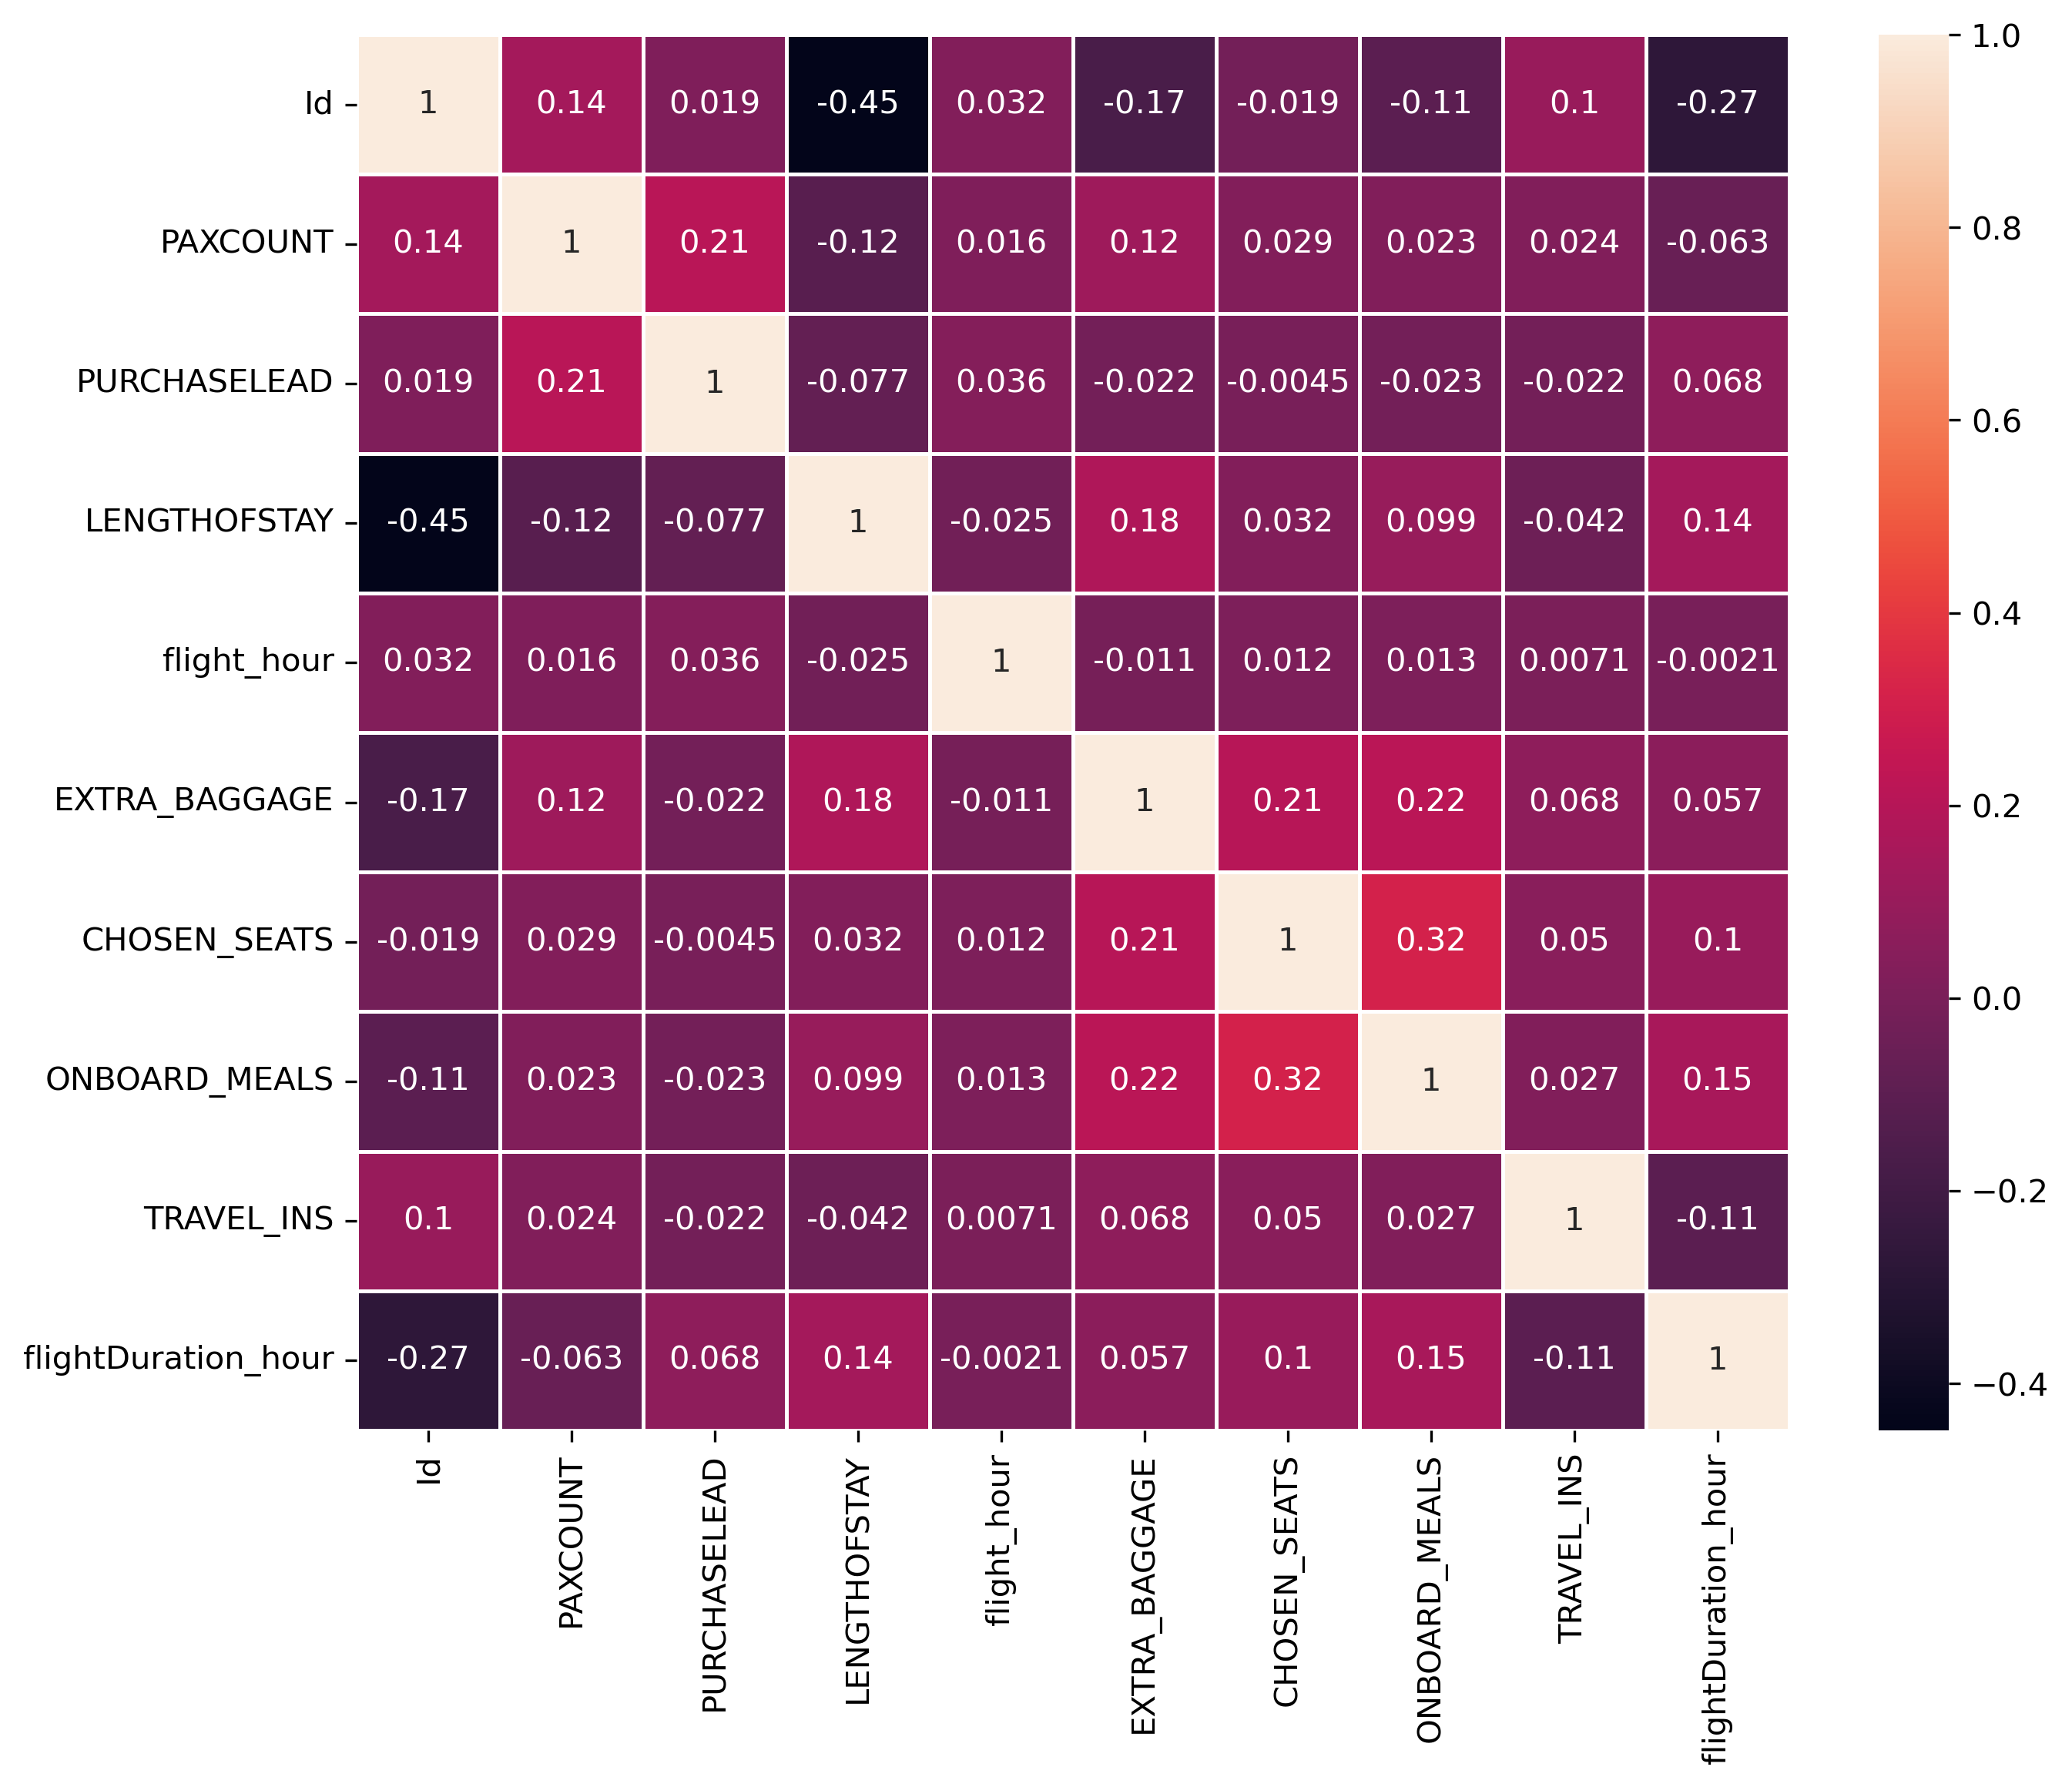

In [11]:
# Created a heatmap to show a rough Idea of the overall correlation among variables
plt.figure(figsize=(10,8), dpi=300)
sns.heatmap(customers.corr(),
            annot=True,
            linewidth=0.8,
            cbar=True)

## Exploring how paxcount affects wether a customer will purchase a travel insurance

Hypothesis:
Given that PAXCOUNT is the number of people traveling per ticket purchase.
We can consider the fact that traveling in a group would be safer as compared to traveling alone or in pair. Thus, customers that are traveling in smaller groups more likely to buy a travel insurance.

<AxesSubplot:xlabel='PAXCOUNT', ylabel='count'>

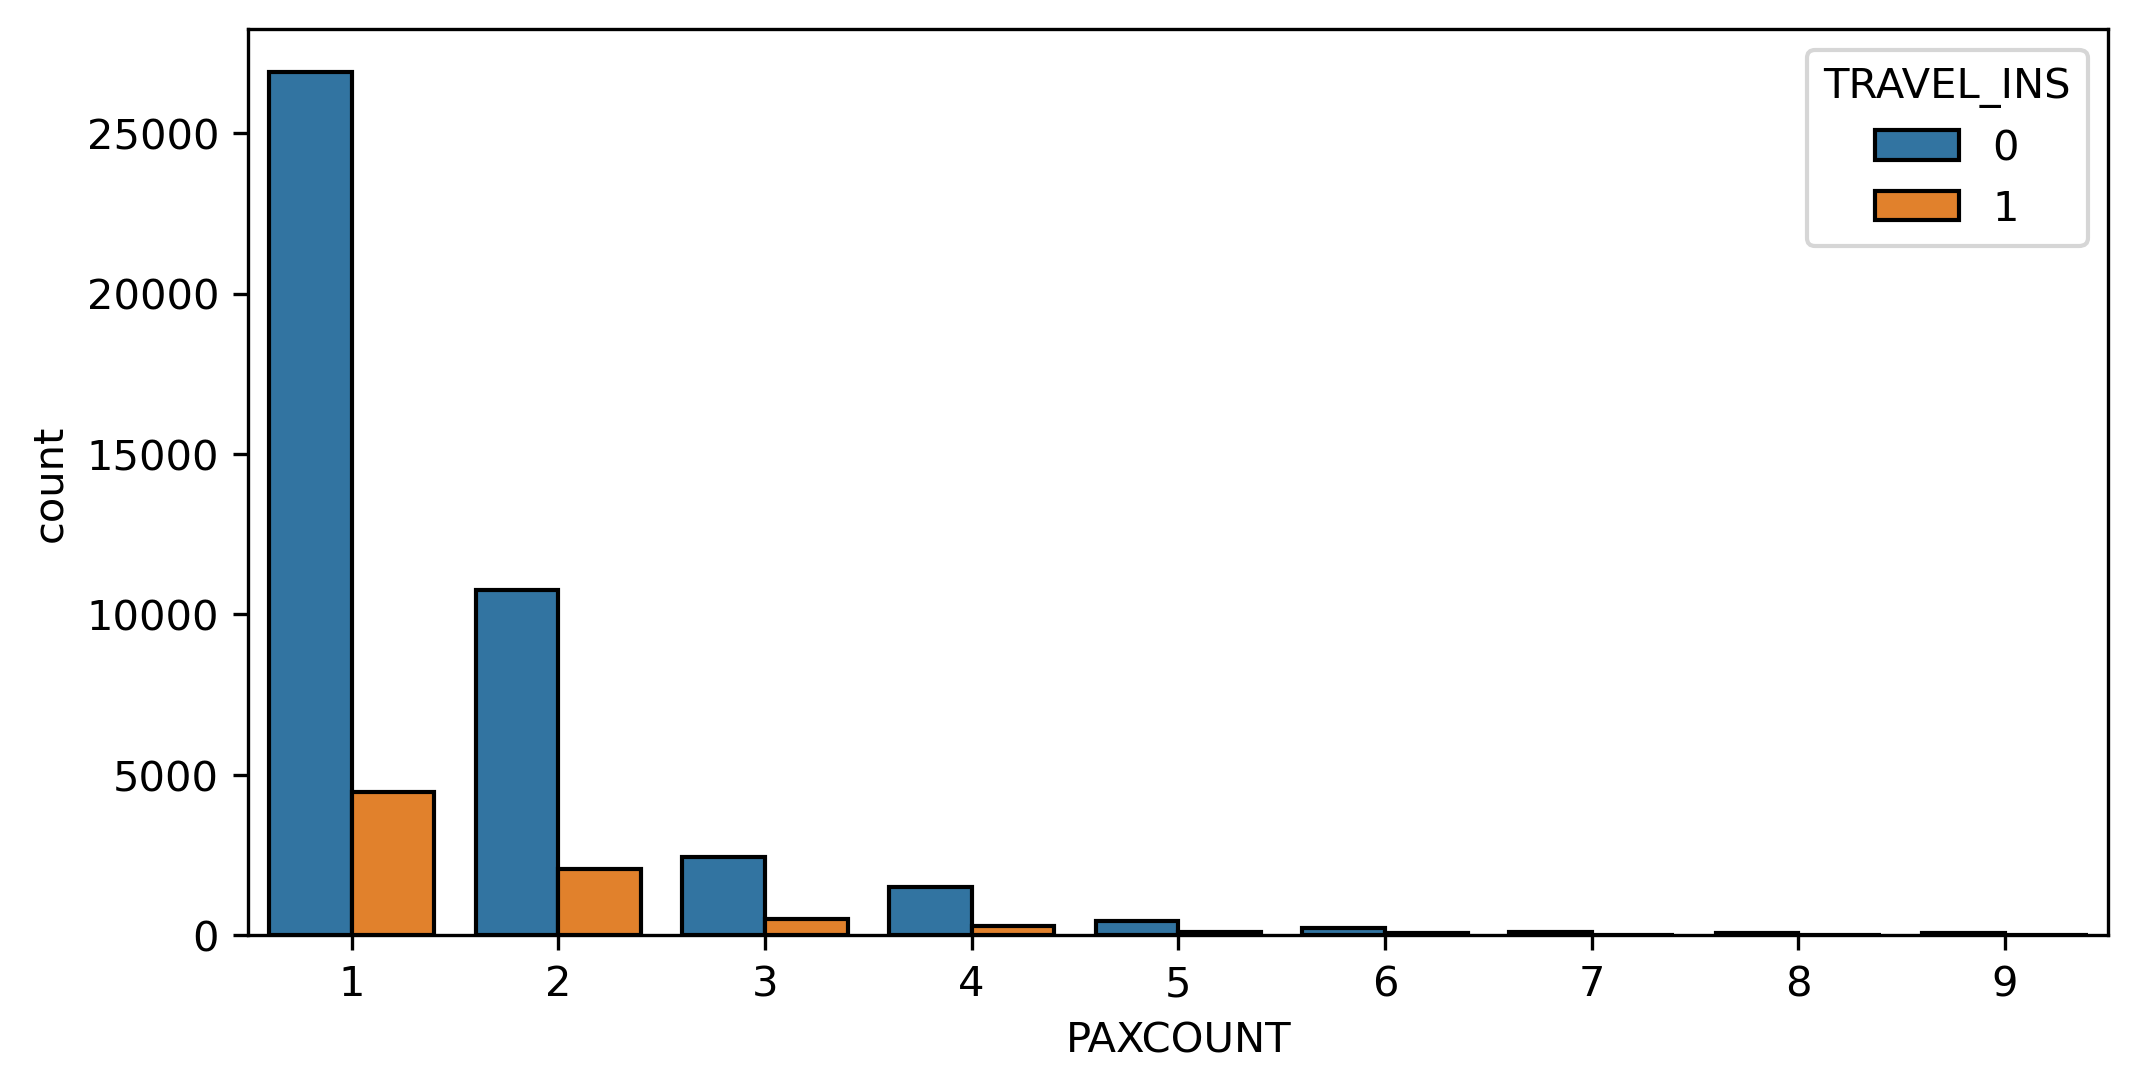

In [12]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x='PAXCOUNT',
              data=customers,
              hue='TRAVEL_INS',
              ec='black')

Through the bar graph above, it can be seen that the majority of the customers are traveling alone. It is also evident that customers traveling on their own take up most of the customer base that bought a travel insurance pre-departure. Therefore it can't be deduced that the smaller the group is, the more likely the purchase of a travel insurance.

In [13]:
# 59.6%, more than half of the total customers that bought travel insurance, travel alone.
# 27.4%, more than a quarter of the total customers that bought travel insurance, travel in pair.
# Customers that travel with a pax count of 3 or more makes up about 13% of the total customers who bought insurance.

pax1 = round((len(bought_insurance[bought_insurance['PAXCOUNT'] == 1]) / len(bought_insurance)) * 100, 1)

pax2 = round((len(bought_insurance[bought_insurance['PAXCOUNT'] == 2]) / len(bought_insurance)) * 100, 1)

pax3 = round((len(bought_insurance[bought_insurance['PAXCOUNT'] >= 3]) / len(bought_insurance)) * 100, 1)

print(f'PAXCOUNT FREQUENCY\n    1      {pax1} %\n    2      {pax2} % \n    3      {pax3} % ')

PAXCOUNT FREQUENCY
    1      59.6 %
    2      27.4 % 
    3      13.0 % 


With the frequency distribution of the customers who chose to purchase a travel insurance shown above. Evidently...

Customers who travel alone makes up more than half of the customers who bought a travel insurance.

Customers who travel in pair makes up slightly more than a quarter of those who bought a travel insurance.

The remaining customers who travel in groups of 3 or more pax, makes up about 13% of those who bought a travel insurance.

## Exploring whether the type of trips will affect a customer's decision on buying  a travel insurance 

Given that there's 3 types of trips:
- Round Trip (Point A to B + Point B to A)
- Circle Trip (Same as round trip but with >=1 stopovers)
- One Way (Point A to B)

Type of trips can determine the customer's purpose of travel. One Way trip could mean that a customer is just returning back to his/her home country and would unlikely need to buy a travel insurance as the individual is traveling back home and not for travel.
There's also a possibility that the customer is traveling within the country/to a different state.

Hypothesis:Customer who buy One Way ticket are the least likely to buy a travel insurance. (as compared to those who bought a Round Trip/Circle Trip) Since they are covered in their home country (assuming most one way trips are for traveling back to home country)


<AxesSubplot:xlabel='TRIP_TYPE', ylabel='count'>

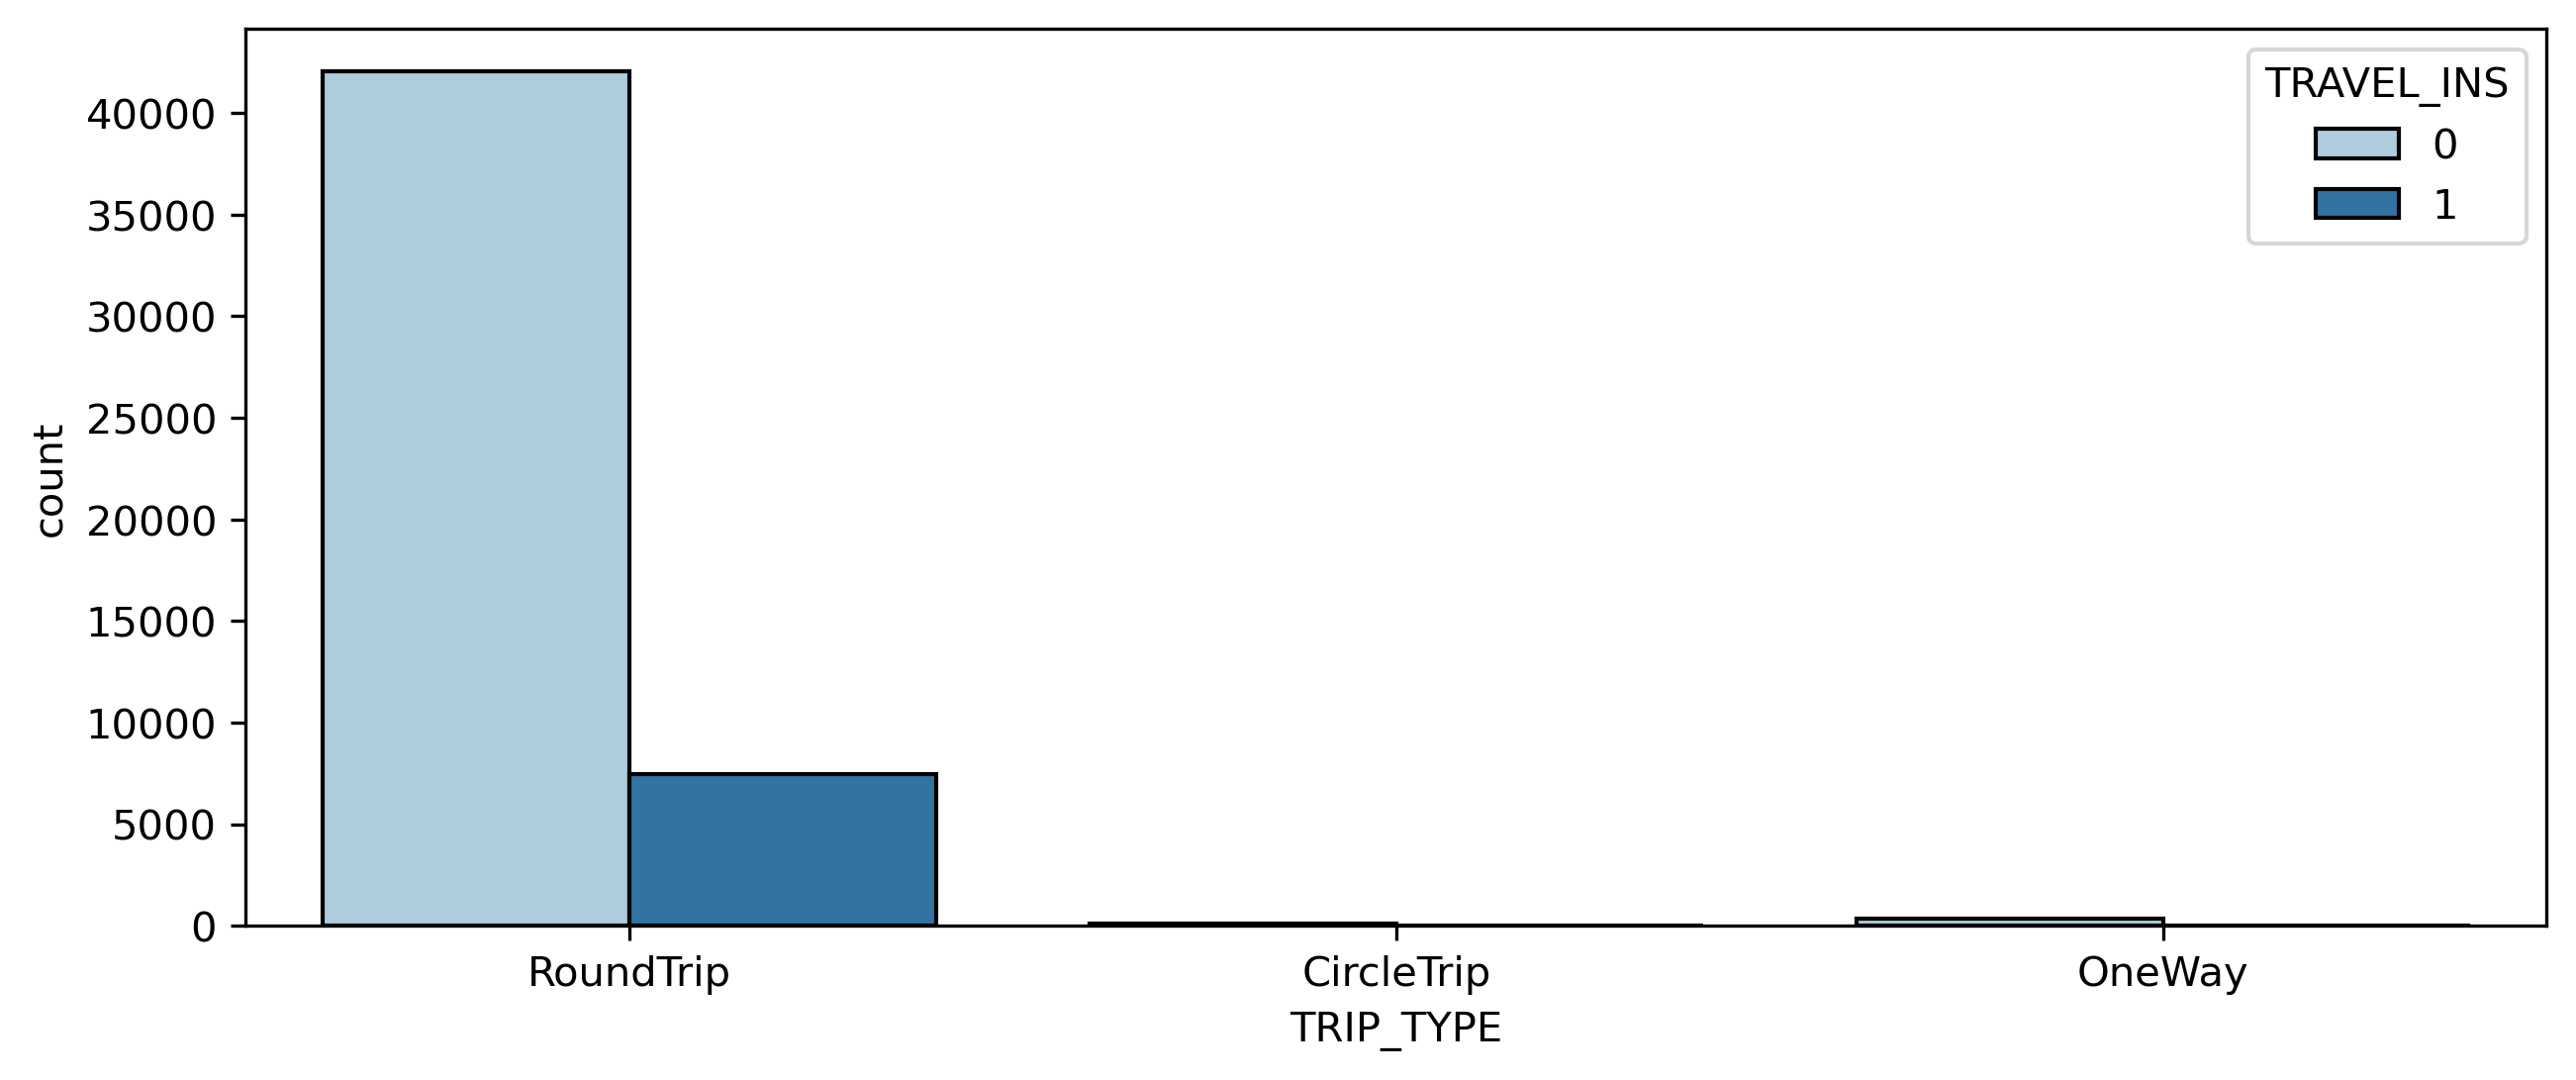

In [14]:
plt.figure(figsize=(10,4),dpi=300)
# Paired would be a good choice if there was a distinct jump from 0 and 1 to 2 and 3
sns.countplot(x='TRIP_TYPE',
              data=customers,
              hue='TRAVEL_INS',
              palette='Paired',
              ec='black')

In [15]:
# 99% of the customers traveling has bought a round trip ticket, leaving a negligible amount of customers who purchase
# other tickets of a different trip type(Circle Trip/One Way)

round((len(customers[customers['TRIP_TYPE'] == 'RoundTrip']) / len(customers)) * 100, 1)

99.0

In [16]:
# Calculating the percentage of customers who bought travel insurance and has purchased a round trip ticket, among all customers
# who bought a round trip ticket

round(len(bought_insurance[bought_insurance['TRIP_TYPE'] == 'RoundTrip']) / len(customers[customers['TRIP_TYPE'] == 'RoundTrip']) * 100, 1)

15.1

15.1% of the customers who purchased a round trip ticket, bought a travel insurance.

We're are unable to conclude that customers who bought one way ticket are more likely to buy travel insurance as:
- There is an insignificant number of customers who bought one way tickets
- There isn't enough information to deduce that one way tickets are meant for traveling back to home country

## Exploring whether days from flight affects a customer purchase behavior

Hypothesis:
Given that PURCHASELEAD is the number of days between the travel date and the booking date. A shorter purchase lead could possibly mean that the customer who bought the air ticket made a spontaneous decision to travel and might mean that purchase decisions are more rash as compared to customers with HIGHER PURCHASELEAD. Given a shorter amount of time to plan for a trip, the customer would be more likely to be careless about having a travel insurance.

In [17]:
customers['PURCHASELEAD'].describe()

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: PURCHASELEAD, dtype: float64

On average, customers will purchase their air tickets around 85 days prior to the day of flight or travel. There are also customers with 0 PURCHASELEAD(0 days prior to flight), which indicates that they have bought their air ticket on the same day of travel.

<AxesSubplot:xlabel='PURCHASELEAD', ylabel='Count'>

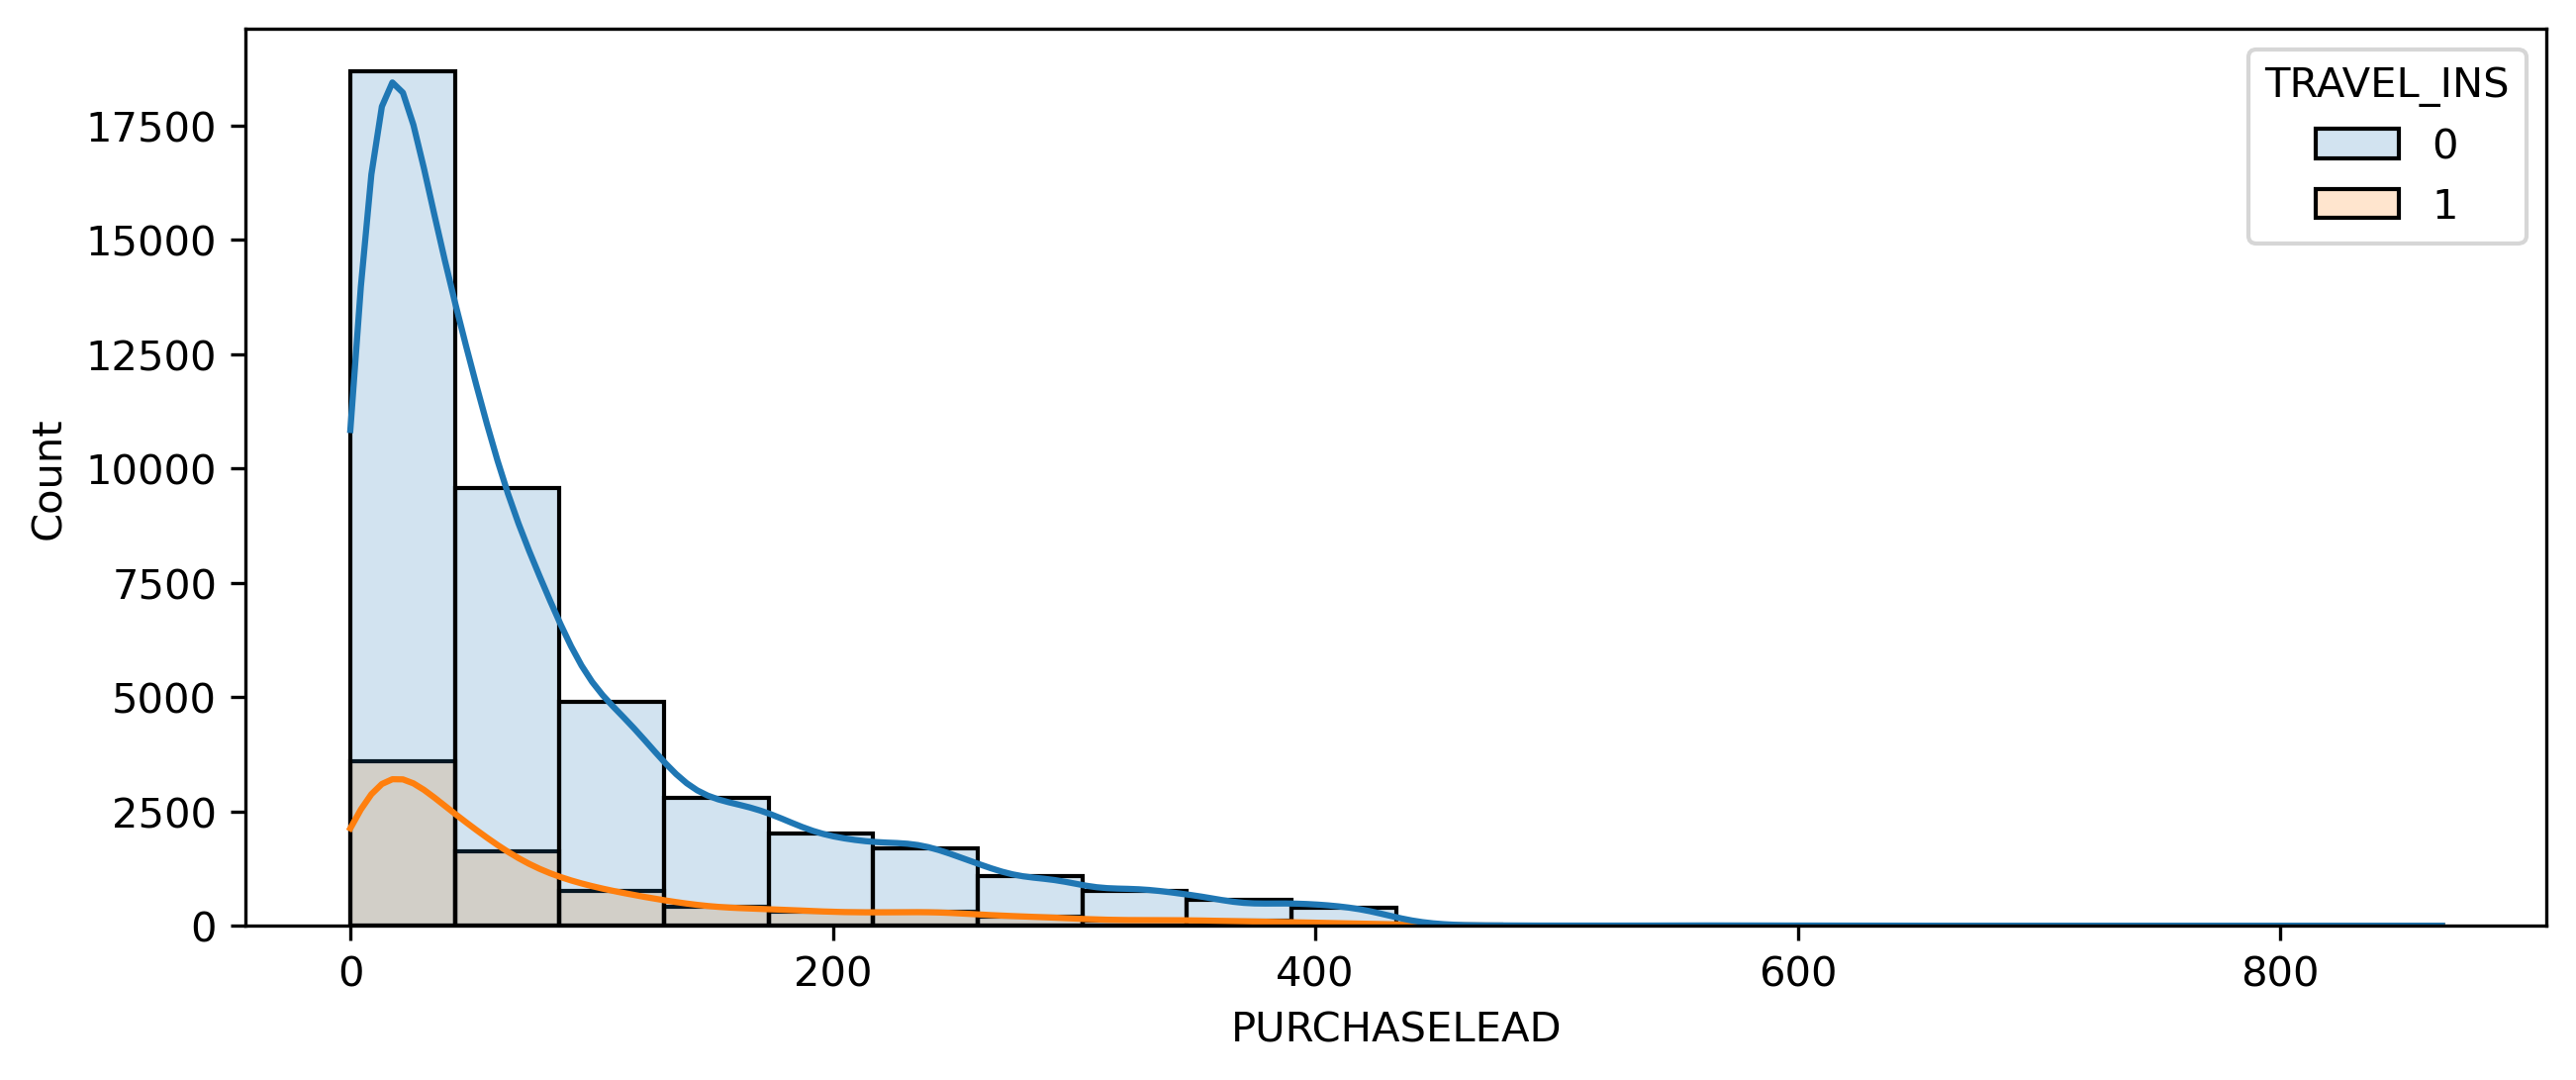

In [18]:
plt.figure(figsize=(10,4),dpi=300)
sns.histplot(data=customers,
             x='PURCHASELEAD',
             kde=True,
             bins=20,
             hue='TRAVEL_INS',
             alpha=0.2)

Through the distribution plot above, we can't conclude our hypothesis since majority of the customers have booked their air tickets at most 115 days in advance to the day of flight. This can be observed as with the rising purchase lead the number of customers who purchase their air tickets grew lesser.

## Exploring whether the length of stay affects whether a customer buys a travel insurance

Hypothesis:
Having a longer length of stay could mean that the customer would have planned a long trip in a foreign country/area. Naturally there'll be a higher risk that comes with a longer stay. Therefore, customers that plan for a longer trip would more likely to purchase a travel insurance.

In [19]:
customers['LENGTHOFSTAY'].describe()

count    50000.00000
mean        23.04456
std         33.88767
min          0.00000
25%          5.00000
50%         17.00000
75%         28.00000
max        778.00000
Name: LENGTHOFSTAY, dtype: float64

Customers have an average length of stay of about 23 days and 75% of the customers stay up till and not more than 28 days.

<AxesSubplot:xlabel='LENGTHOFSTAY', ylabel='Count'>

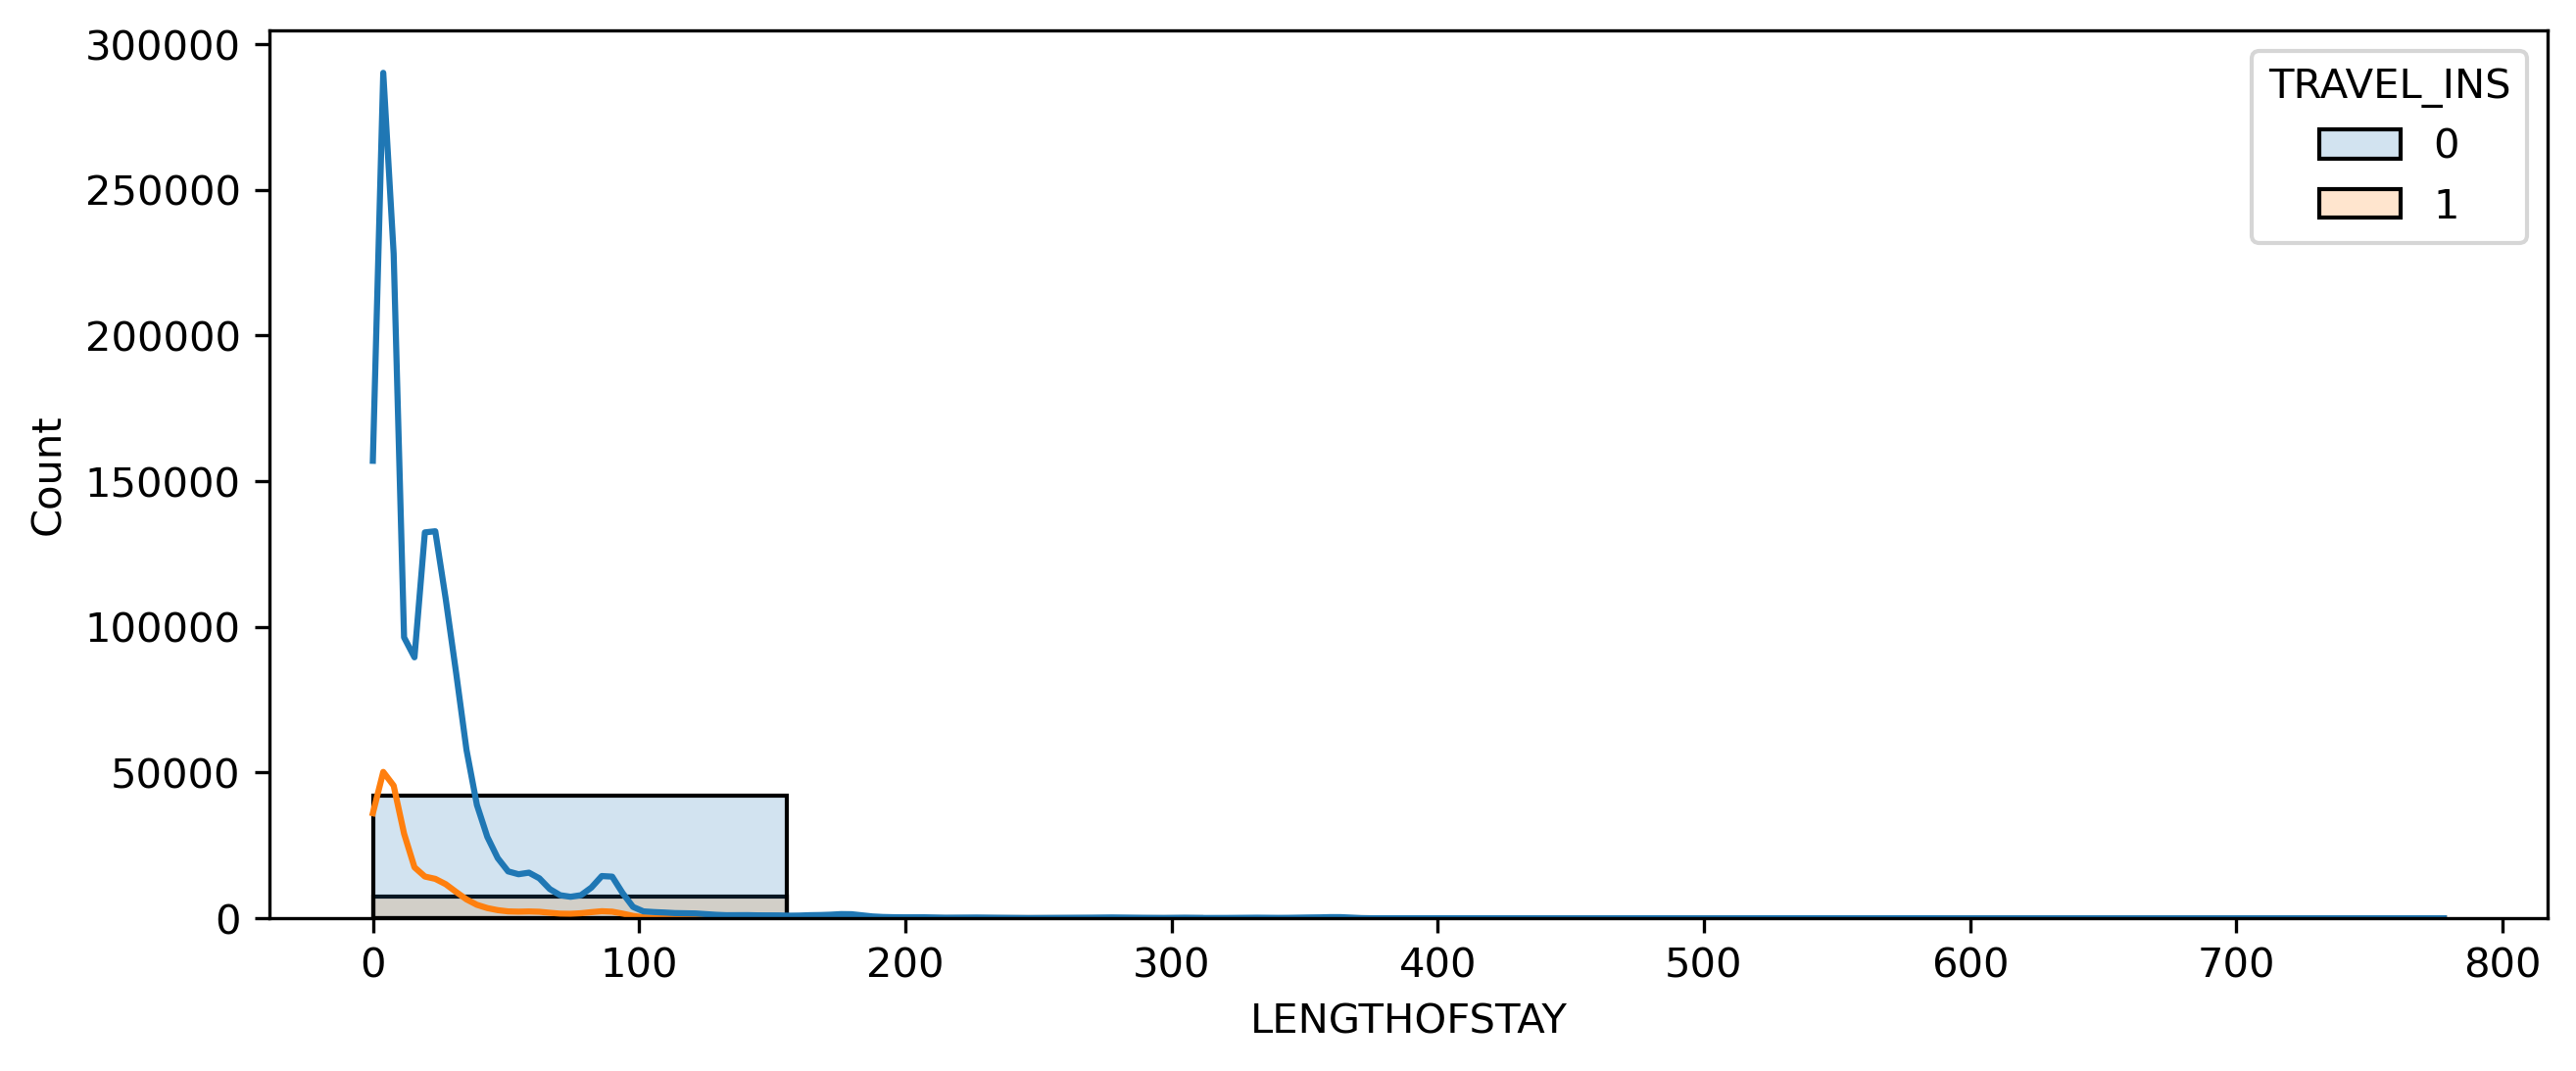

In [20]:
# Exploring trends with length of stay

plt.figure(figsize=(10,4),dpi=300)
sns.histplot(data=customers,
             x='LENGTHOFSTAY',
             kde=True,
             bins=5,
             hue='TRAVEL_INS',
             alpha=0.2)

<AxesSubplot:xlabel='LENGTHOFSTAY', ylabel='Count'>

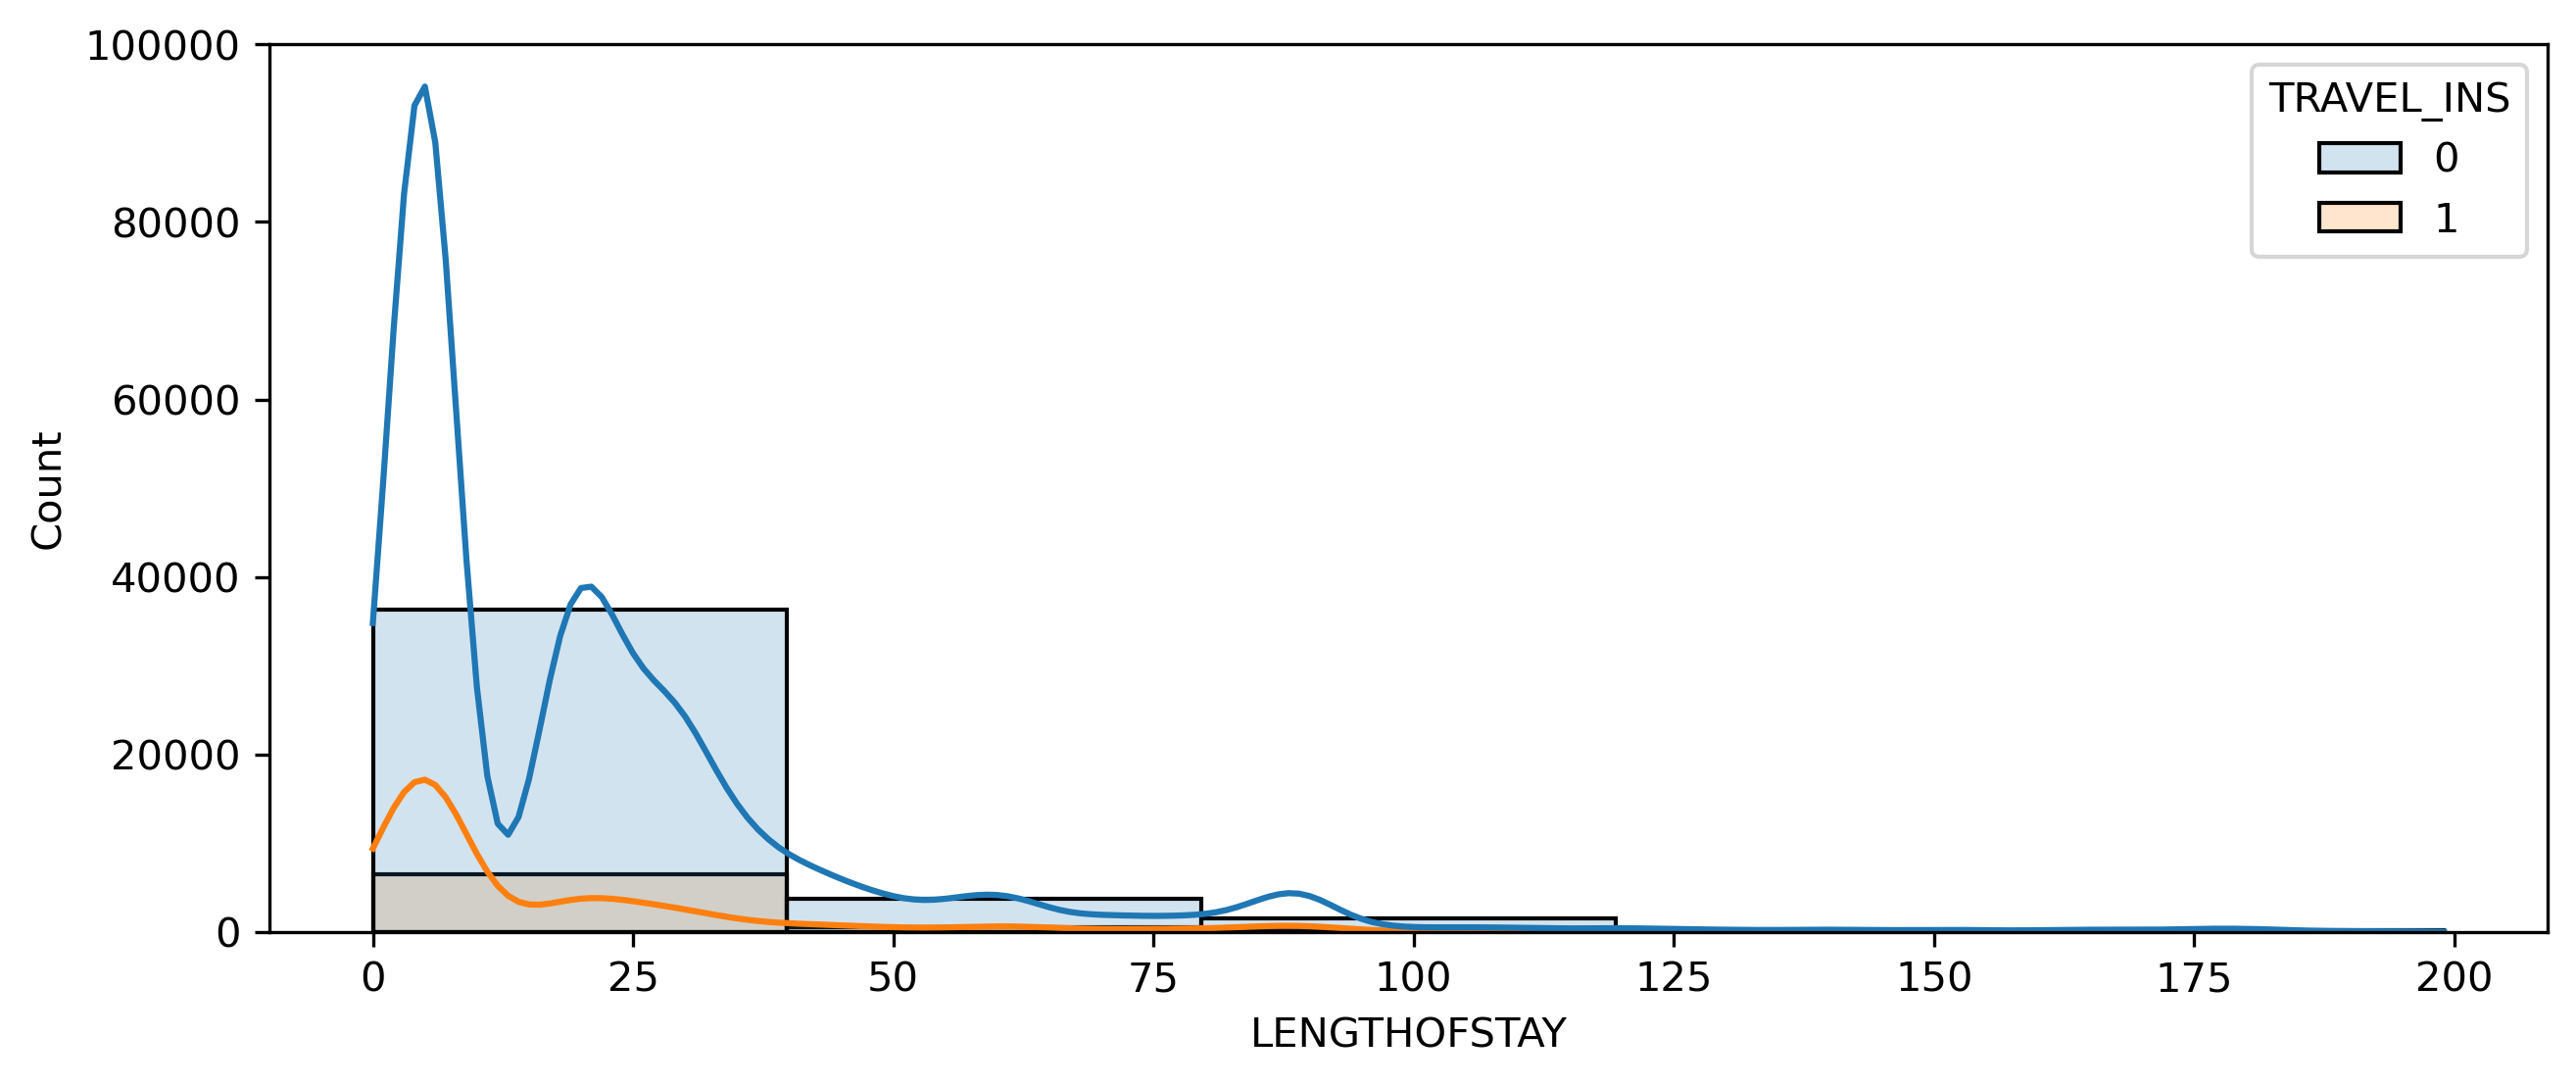

In [21]:
# Since the majority of the customers have a length of stay of below 200. We'll zoom in onto the majority of the customers with
# length of stay between 0 and 200

majority_lengthofstay = customers[customers['LENGTHOFSTAY']<200]

plt.figure(figsize=(10,4),dpi=300)
sns.histplot(data=majority_lengthofstay,
             x='LENGTHOFSTAY',
             kde=True,bins=5,
             hue='TRAVEL_INS',
             alpha=0.2)

In the histogram shown above it is more clearly shown that majority of the customers do not stay beyond 40 days. However there's a dip reflected in the graph from the range of 0 to 25 days of stay..

<AxesSubplot:xlabel='LENGTHOFSTAY', ylabel='Count'>

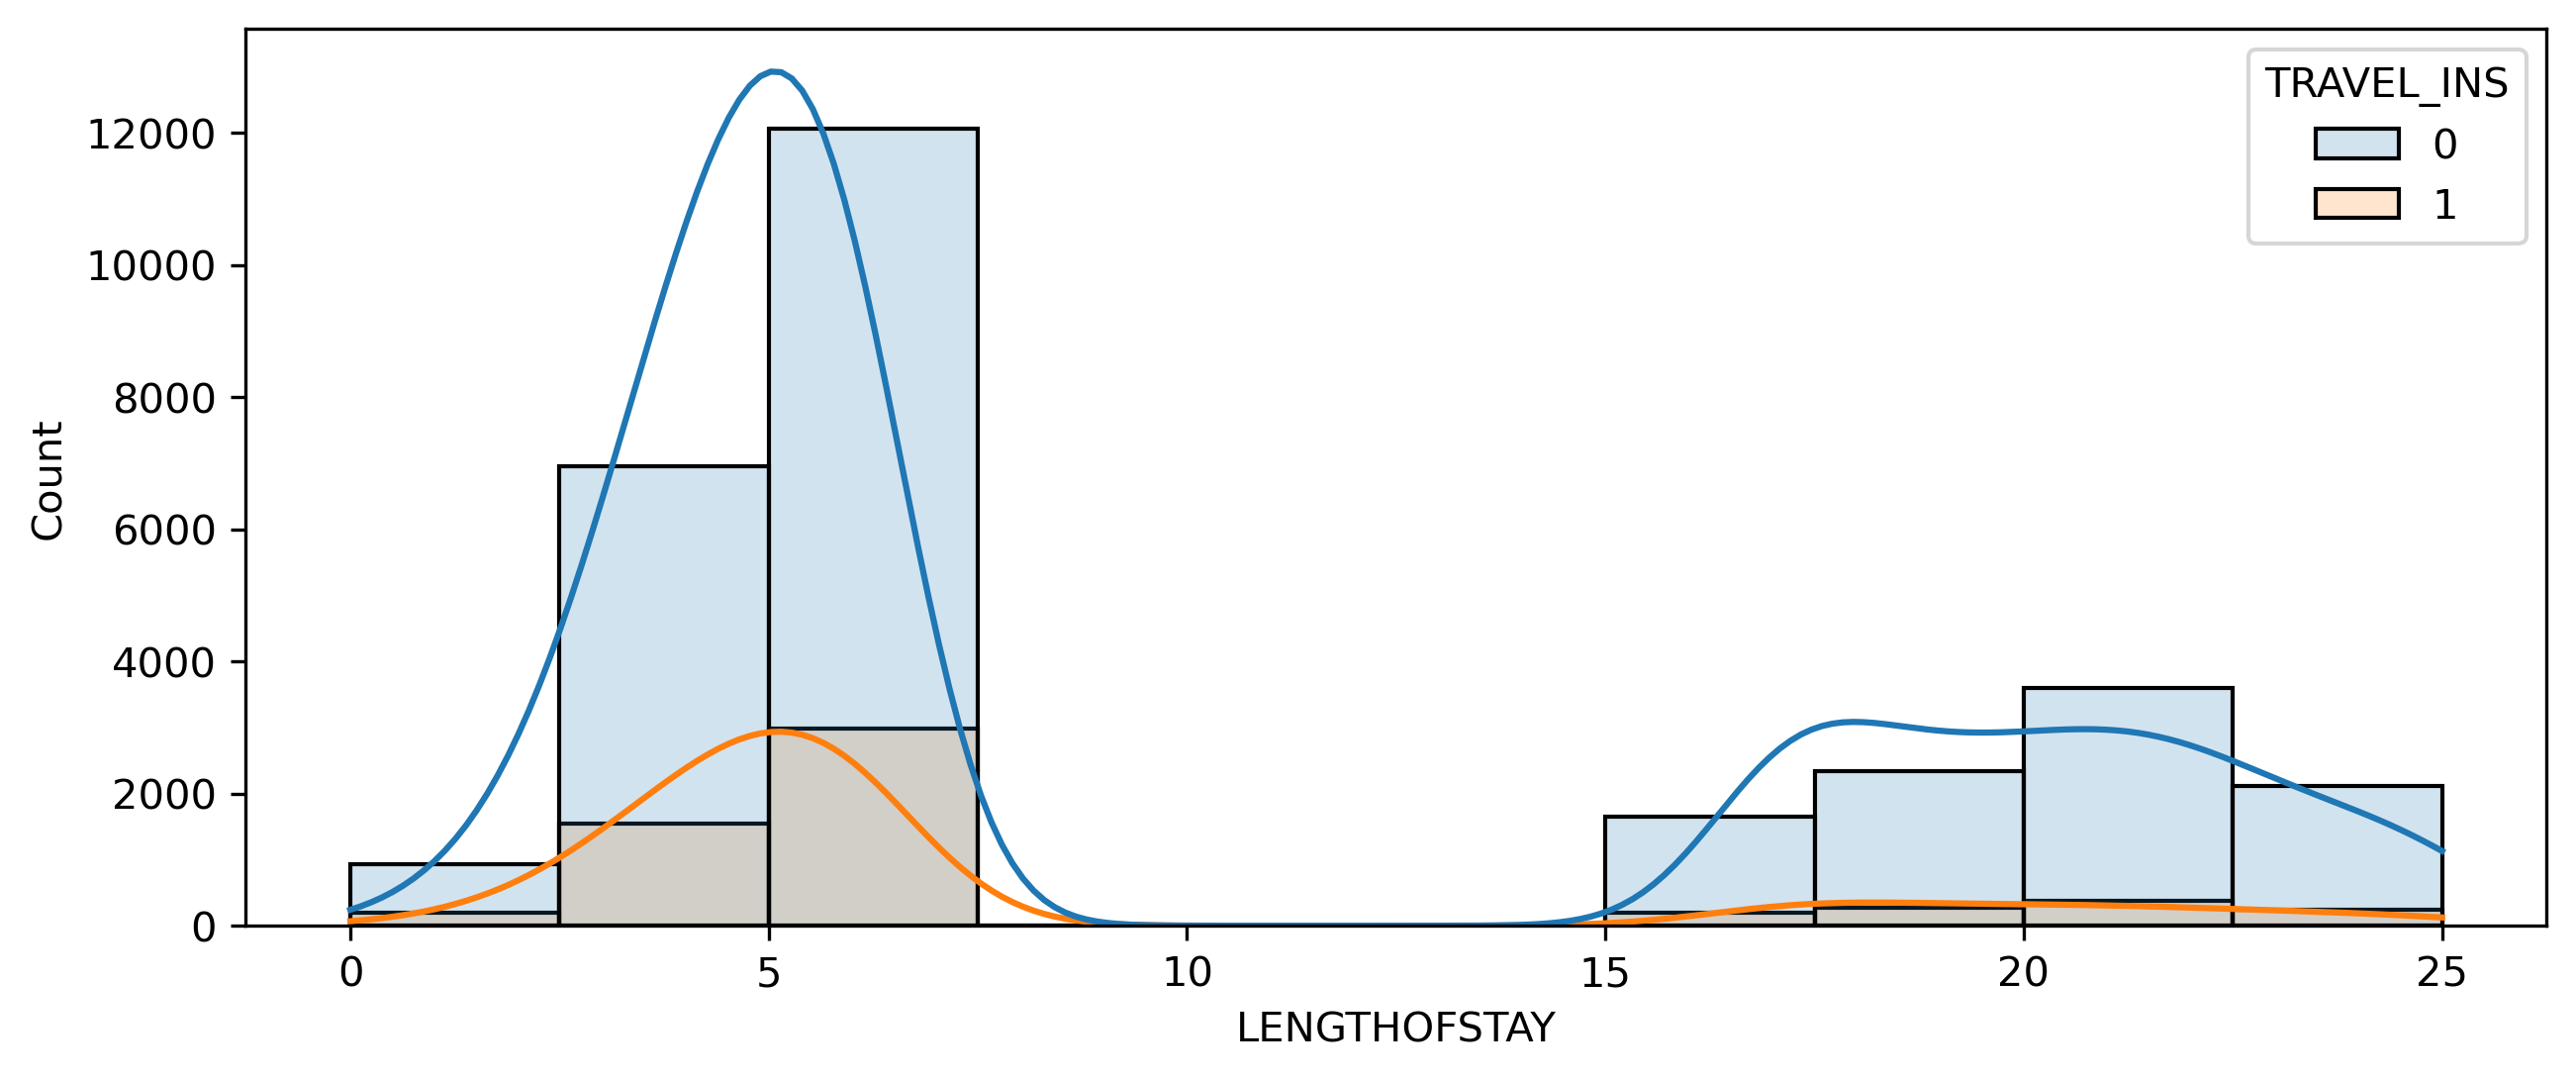

In [22]:
# Exploring the dip in the length of stay between 0 to 25 days of stay..

plt.figure(figsize=(10,4),dpi=300)
sns.histplot(data=customers[customers['LENGTHOFSTAY'] <= 25], 
             x='LENGTHOFSTAY',
             kde=True,
             bins=10,
             hue='TRAVEL_INS',alpha=0.2)

Through further investigation using a histogram that narrows down to the length of stay between 0 and 25, it can be seen that there is little to no customers that spend 10 to 15 days overseas.

## Exploring whether time of flight affects customer's decision on buying travel insurance 

Hypothesis:
Flight hour is the time of departure. Since night time would have a poorer visibility as compared to the day, possible obstructions faced during flight might be more challenging to spot and hence less safer to fly. This is a consideration that a customer might have when purchasing a ticket for travel and hence more likely to purchase a travel insurance.

In [23]:
# Creating a list of hours ranging from the evening till the the next day. To be used in the order parameter for plotting later.

night_to_day = [18, 19, 20, 21, 22, 23] + list(range(0,18))

<AxesSubplot:xlabel='flight_hour', ylabel='count'>

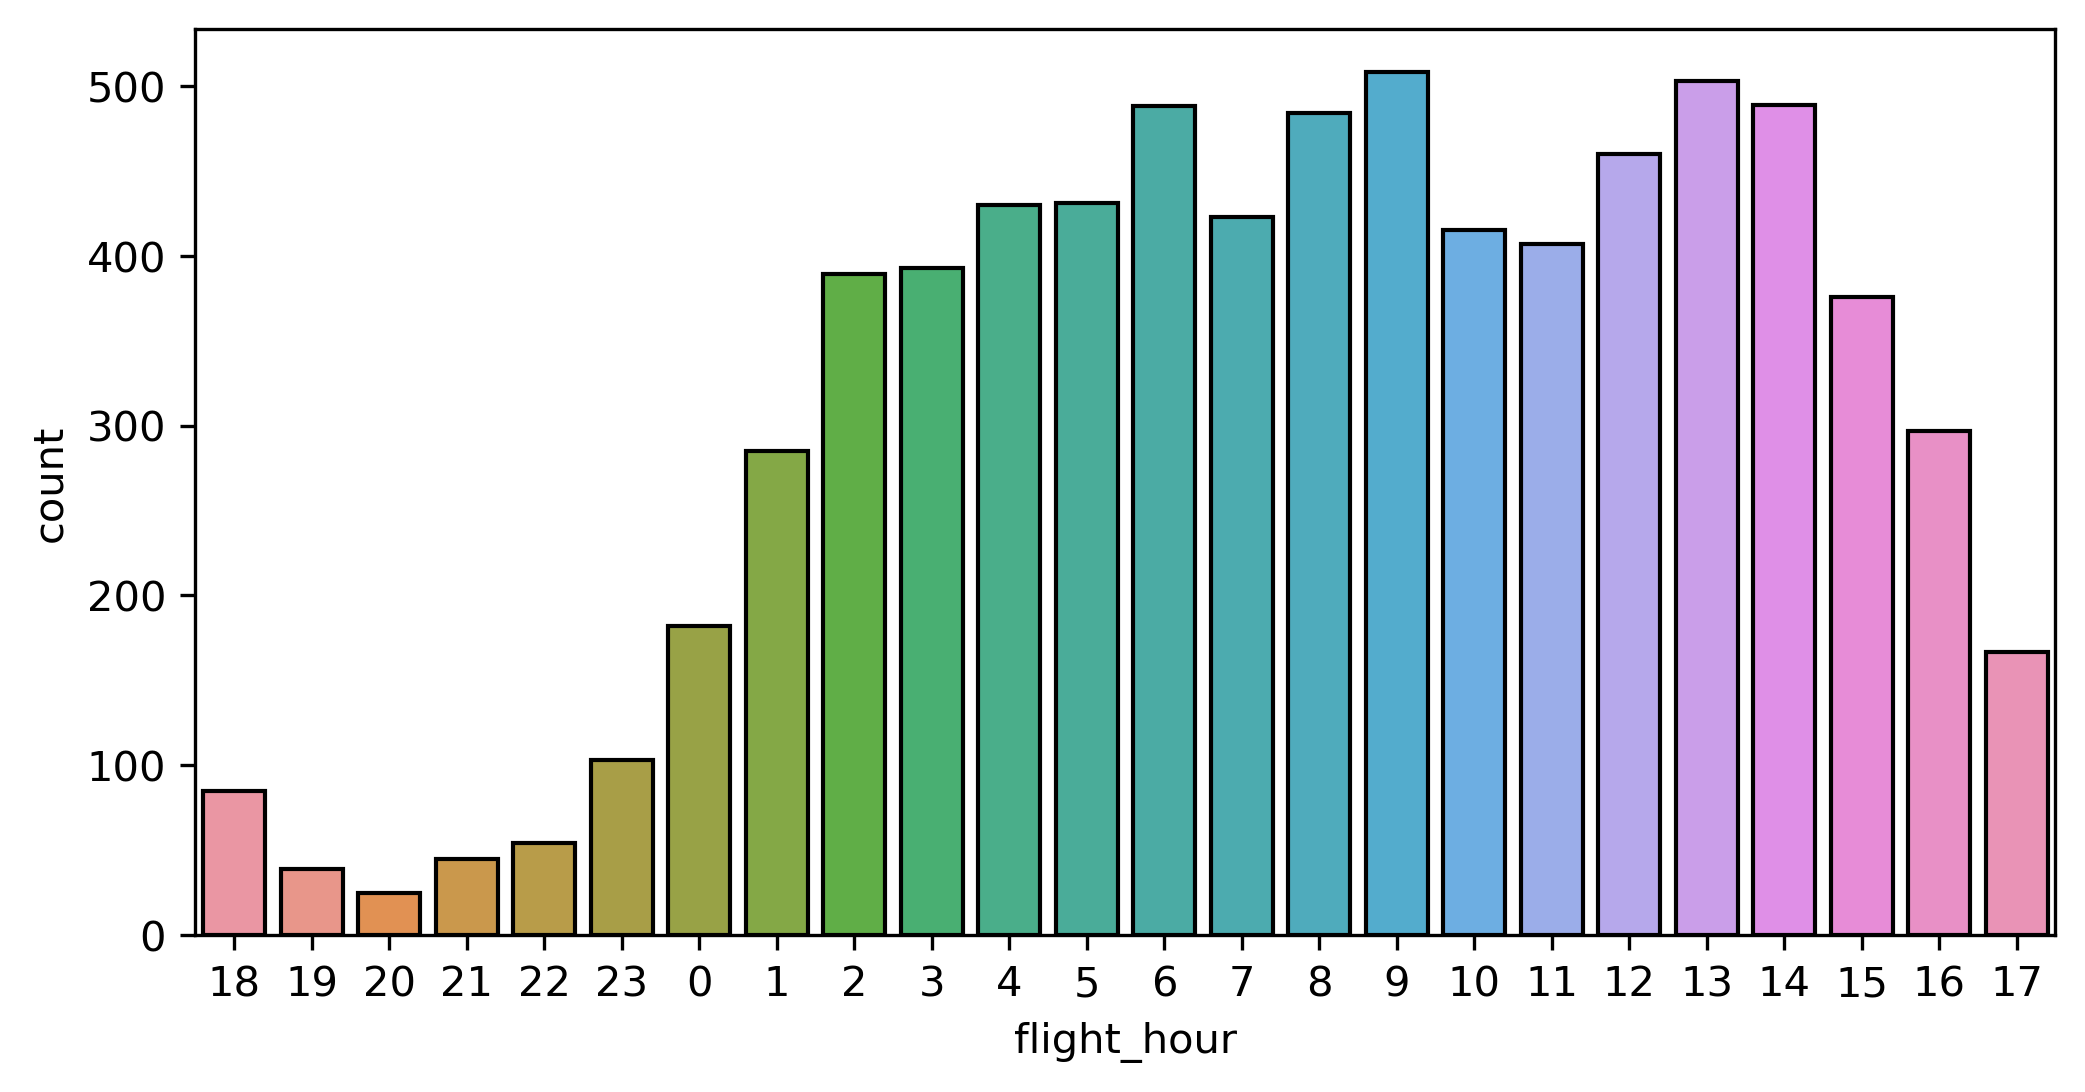

In [24]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x='flight_hour',
              data=bought_insurance,
              order=night_to_day,
              ec='black')

It is observed that small amount of customers that bought travel insurance, travel in the evening from 6pm(1800HRS) to 11pm(2300HRS), however from 11pm(2300HRS) onwards, the number of customers who bought travel insurance that are traveling exponentially increased till the time 2am(0200HRS). 

The number of customers that bought travel insurance with flight time from 2am onwards does not have huge changes until the time of about 2pm(1400HRS) onwards where the numbers drops back exponentially till 8pm(2000HRS).

Even though there's an exponential increase in the number of customers that bought travel insurance having a flight time from 11pm(2300HRS) to 2am(0200HRS) where flight takes place at night where vision is poor. Flight during the day time ranging from 6am(0600hrs) till 5pm(1700HRS) still comprises of the majority of the customers (that bought travel insurance) traveling.

We could conclude that customers prefer travelling during the day time as compared to night time. We could not, however deduce that the customers will be more likely to buy travel insurance during night flight as majority of them choose to fly during the day.

## Exploring day of flight relationships

In [25]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

<AxesSubplot:xlabel='flight_day', ylabel='count'>

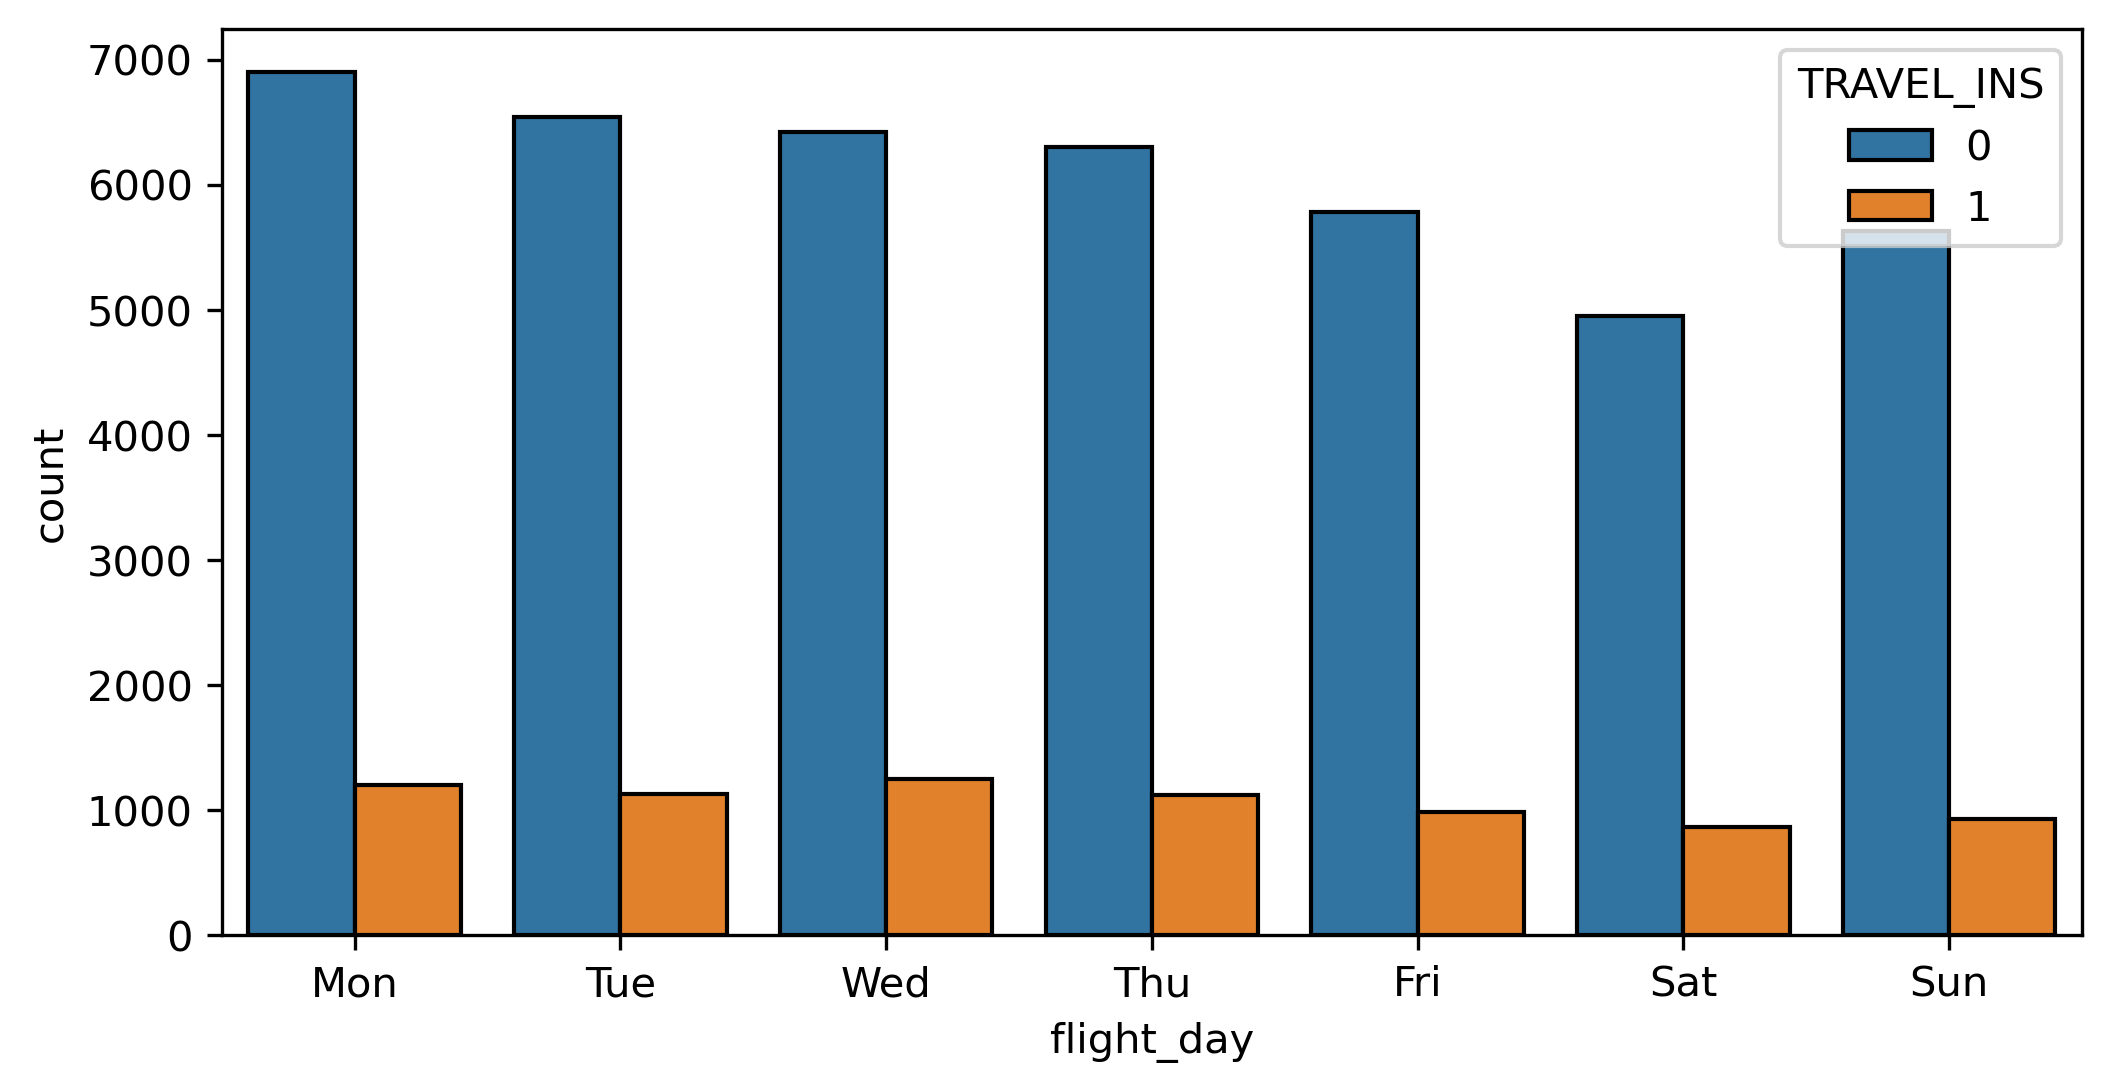

In [26]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x='flight_day',
              data=customers,
              hue='TRAVEL_INS'
              ,order=day_order,
              ec='black')

In [27]:
# Showing total no of customers traveling per day of the week

customers.flight_day.value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

Customers travel the most on Mondays and the least on Saturdays. Overall there are no distinct differences in the number of customers traveling among the days in the week.

## Exploring whether the socio-economic status of a country affects whether a customer will buy a travel insurance

Hypothesis:
Customers coming from a 3rd world country would be less likely to purchase a travel insurance as compared to a 1st world since an individual from a 3rd world would mean that they are less likely to be financially capable to purchase an insurance.

In [28]:
firstWorld = ['Norway',
 'United States',
 'Denmark',
 'Canada',
 'Switzerland',
 'Norway',
 'Sweden',
 'Australia',
 'Canada',
 'Netherlands',
 'Belgium',
 'Japan',
 'Singapore',
 'Germany',
 'New Zealand',
 'France',
 'United Kingdom',
 'Qatar',
 'South Korea',
 'Italy',
 'Saudi Arabia',
 'Kuwait',
 'Spain',
 'Bahrain',
 'United Arab Emirates',
 'Portugal',
 'Turkey',
 'Greece',
 'Oman',
 'Chile',
 'Brunei'
 
]

secondWorld = ['Russia', 'Kazakhstan', 'China', 'Vietnam', 'Laos', 'Cambodia', 'Romania', 'Malaysia', 'Taiwan','Hong Kong',
              'Mauritius','Czech Republic','Mexico', 'Macau','India','Indonesia',]

thirdWorld = ['(not set)',
 'Bangladesh',
 'Philippines',
 'Réunion',
 'Thailand',
 'Nepal',
 'Kenya',
 'Myanmar (Burma)',
 'Seychelles',
 'Vanuatu',
 'Pakistan',
 'Iraq',
 'Sri Lanka']

In [29]:
def GetStatus(counry):
    if counry in firstWorld:
        return "First World"
    elif counry in secondWorld:
        return "Second World"
    else:
        return "Third World"

bought_insurance['COUNTRY_STATUS'] = bought_insurance['ORIGIN_COUNTRY'].apply(lambda x: GetStatus(x))
bought_insurance.head()

C:\Users\LXH\AppData\Local\Temp/ipykernel_21468/2989565684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bought_insurance['COUNTRY_STATUS'] = bought_insurance['ORIGIN_COUNTRY'].apply(lambda x: GetStatus(x))


,Id,PAXCOUNT,SALESCHANNEL,TRIP_TYPE,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,ROUTE,ORIGIN_COUNTRY,EXTRA_BAGGAGE,CHOSEN_SEATS,ONBOARD_MEALS,TRAVEL_INS,flightDuration_hour,COUNTRY_STATUS
82,83,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,1,8.83,Second World
86,87,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,1,8.83,Second World
94,95,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,1,8.83,First World
109,110,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,1,8.83,Second World
122,123,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,1,8.83,Second World


In [30]:
country_counts_boughtI = bought_insurance['ORIGIN_COUNTRY']

country_counts_boughtI.value_counts()

Malaysia                2468
Australia                900
China                    694
Indonesia                615
Japan                    478
Thailand                 470
South Korea              462
Singapore                299
Taiwan                   224
India                    131
Vietnam                  114
Macau                     95
United States             84
Philippines               75
Hong Kong                 73
New Zealand               54
Brunei                    41
Cambodia                  36
United Kingdom            21
(not set)                 14
France                    14
Myanmar (Burma)           13
Germany                   12
Saudi Arabia              11
Italy                     11
Laos                       6
Qatar                      5
Sweden                     5
Mauritius                  4
Oman                       3
Denmark                    3
Russia                     3
Bahrain                    3
Nepal                      3
Switzerland   

<AxesSubplot:xlabel='COUNTRY_STATUS', ylabel='count'>

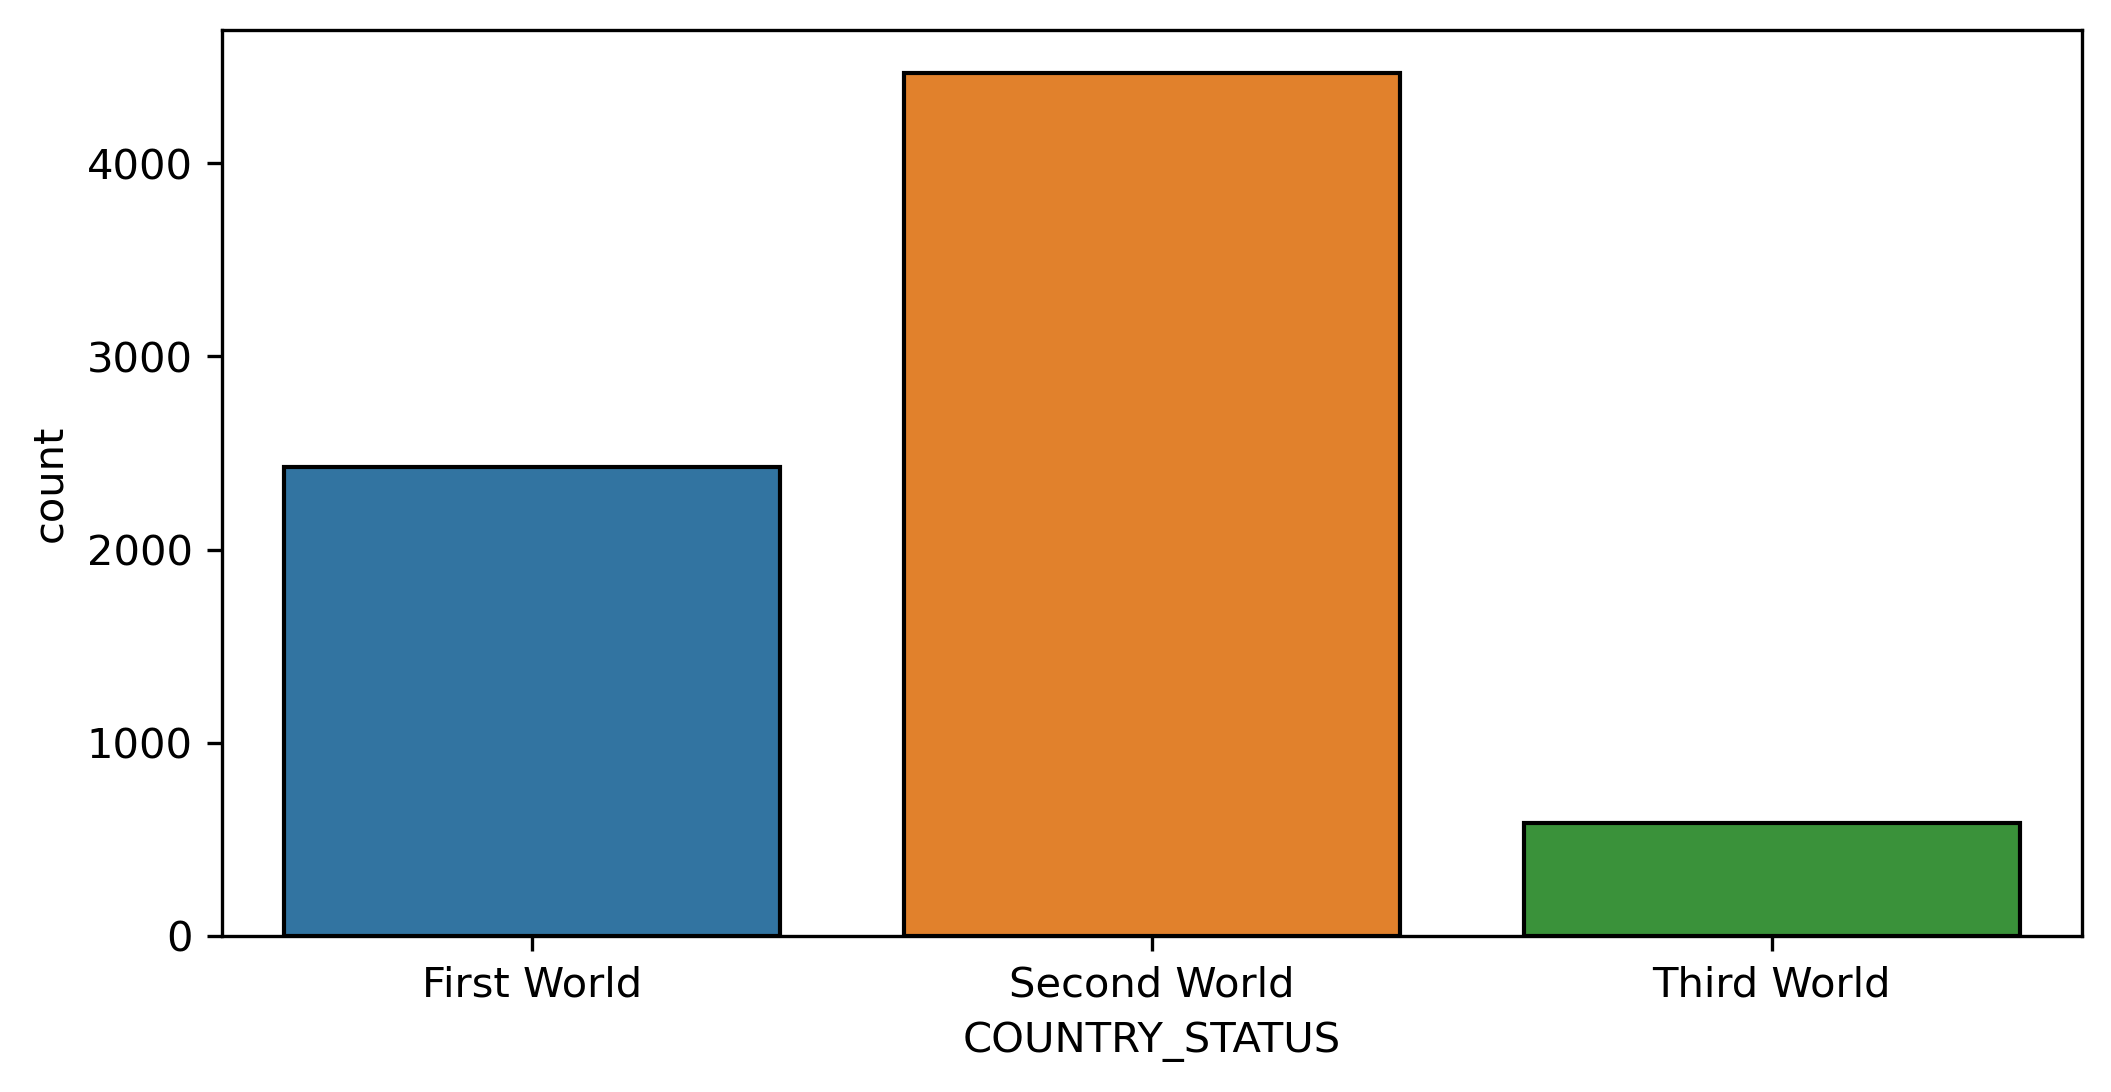

In [31]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x='COUNTRY_STATUS',
              data=bought_insurance,
              order=['First World', 'Second World', 'Third World'],
              ec='black')

The above bar graph shows that majority of the customers that bought travel insurance are from second world countries. However, knowing that the majority of the customer base comes from Malaysia, we'll remove customers traveling from Malaysia to have a better idea whether a country's status affects the customer's ability to buy a travel insurance, since there will be lesser bias in the data set.

<AxesSubplot:xlabel='COUNTRY_STATUS', ylabel='count'>

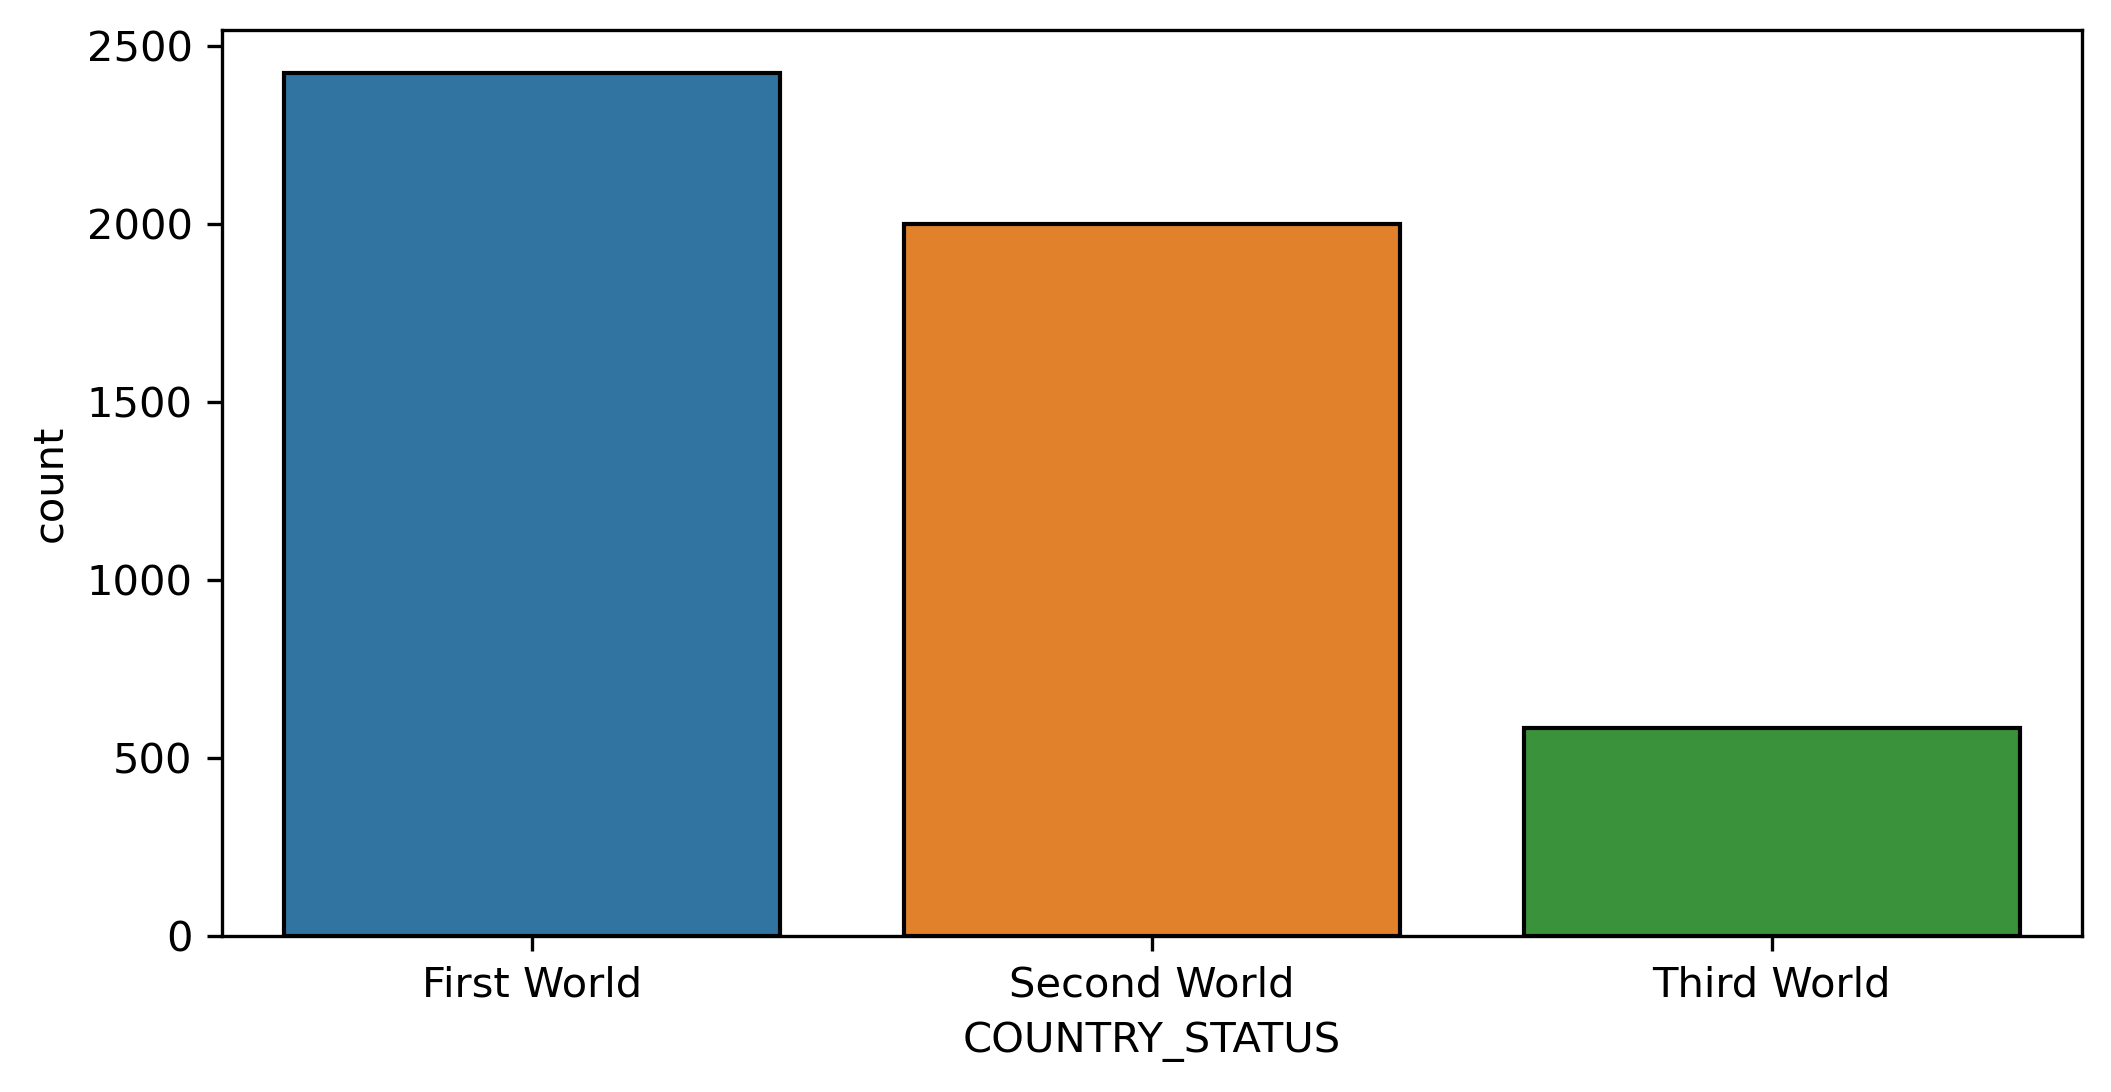

In [32]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x='COUNTRY_STATUS',
              data=bought_insurance[bought_insurance['ORIGIN_COUNTRY']!='Malaysia'],
              order=['First World', 'Second World', 'Third World'],
              ec='black')

With Malaysia customers removed, it is evidently shown that country with better socio-economic status have better capability of buying an insurance.

## EXPLORING EXTRA BAGGAGE RELATIONSHIPS

Hypothesis:
Having brought more baggage could mean that the customer is planning to have a long trip at a foreign country/area. Quite possibly correlated with length of travel. Since naturally there'll be a higher risk that comes with a longer stay, the customer is more likely to buy a travel insurance.
Considering higher chances of baggage lost, the customer would also more likely to buy a travel insurance.

<AxesSubplot:xlabel='EXTRA_BAGGAGE', ylabel='count'>

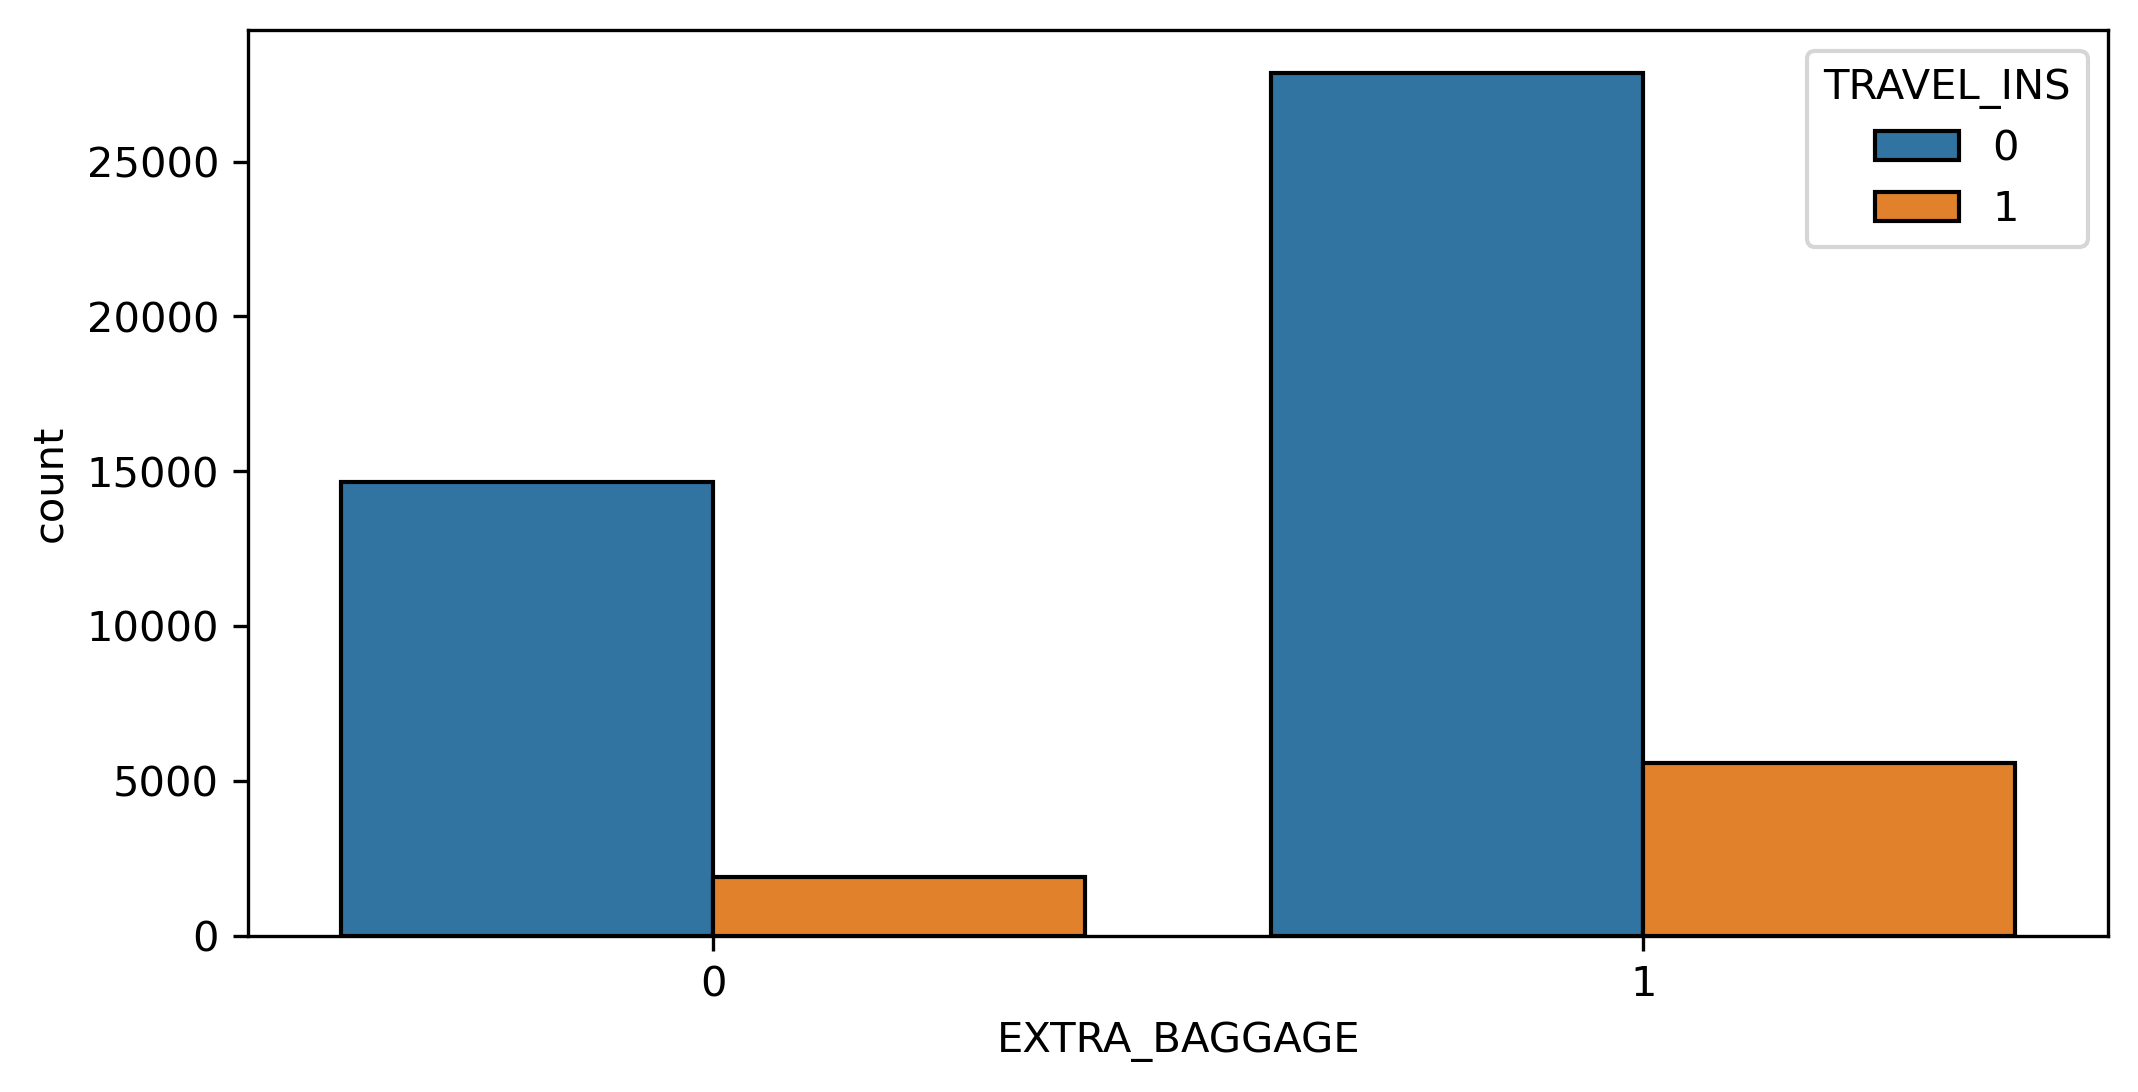

In [33]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x='EXTRA_BAGGAGE',
              data=customers,
              hue='TRAVEL_INS',
              ec='black')

It can't be deduced that with more baggages comes are more likely chance that a  customer will buy a travel insurance since majority of the customer base bought tickets without purchase of a travel insurance.

In [34]:
round(len(customers[customers['EXTRA_BAGGAGE'] == 1]) / len(customers) * 100,1)

66.9

More than half (66.9%) of the customers traveling, has extra baggage during their trip.

In [35]:
customers[['EXTRA_BAGGAGE','LENGTHOFSTAY','PAXCOUNT']].corr()

,EXTRA_BAGGAGE,LENGTHOFSTAY,PAXCOUNT
EXTRA_BAGGAGE,1.000000,0.176757,0.120404
LENGTHOFSTAY,0.176757,1.000000,-0.115850
PAXCOUNT,0.120404,-0.115850,1.000000


There is a positive correlation value (0.12) between extra baggage and paxcount, which makes sense since with a higher paxcount, there will be extra baggages per flight.

A positive correlation (0.177) between extra baggage and length of stay can also be observed. This could make sense if an individual is planning to have a longer stay in a foreign country, and would require extra baggages.

<AxesSubplot:xlabel='EXTRA_BAGGAGE', ylabel='count'>

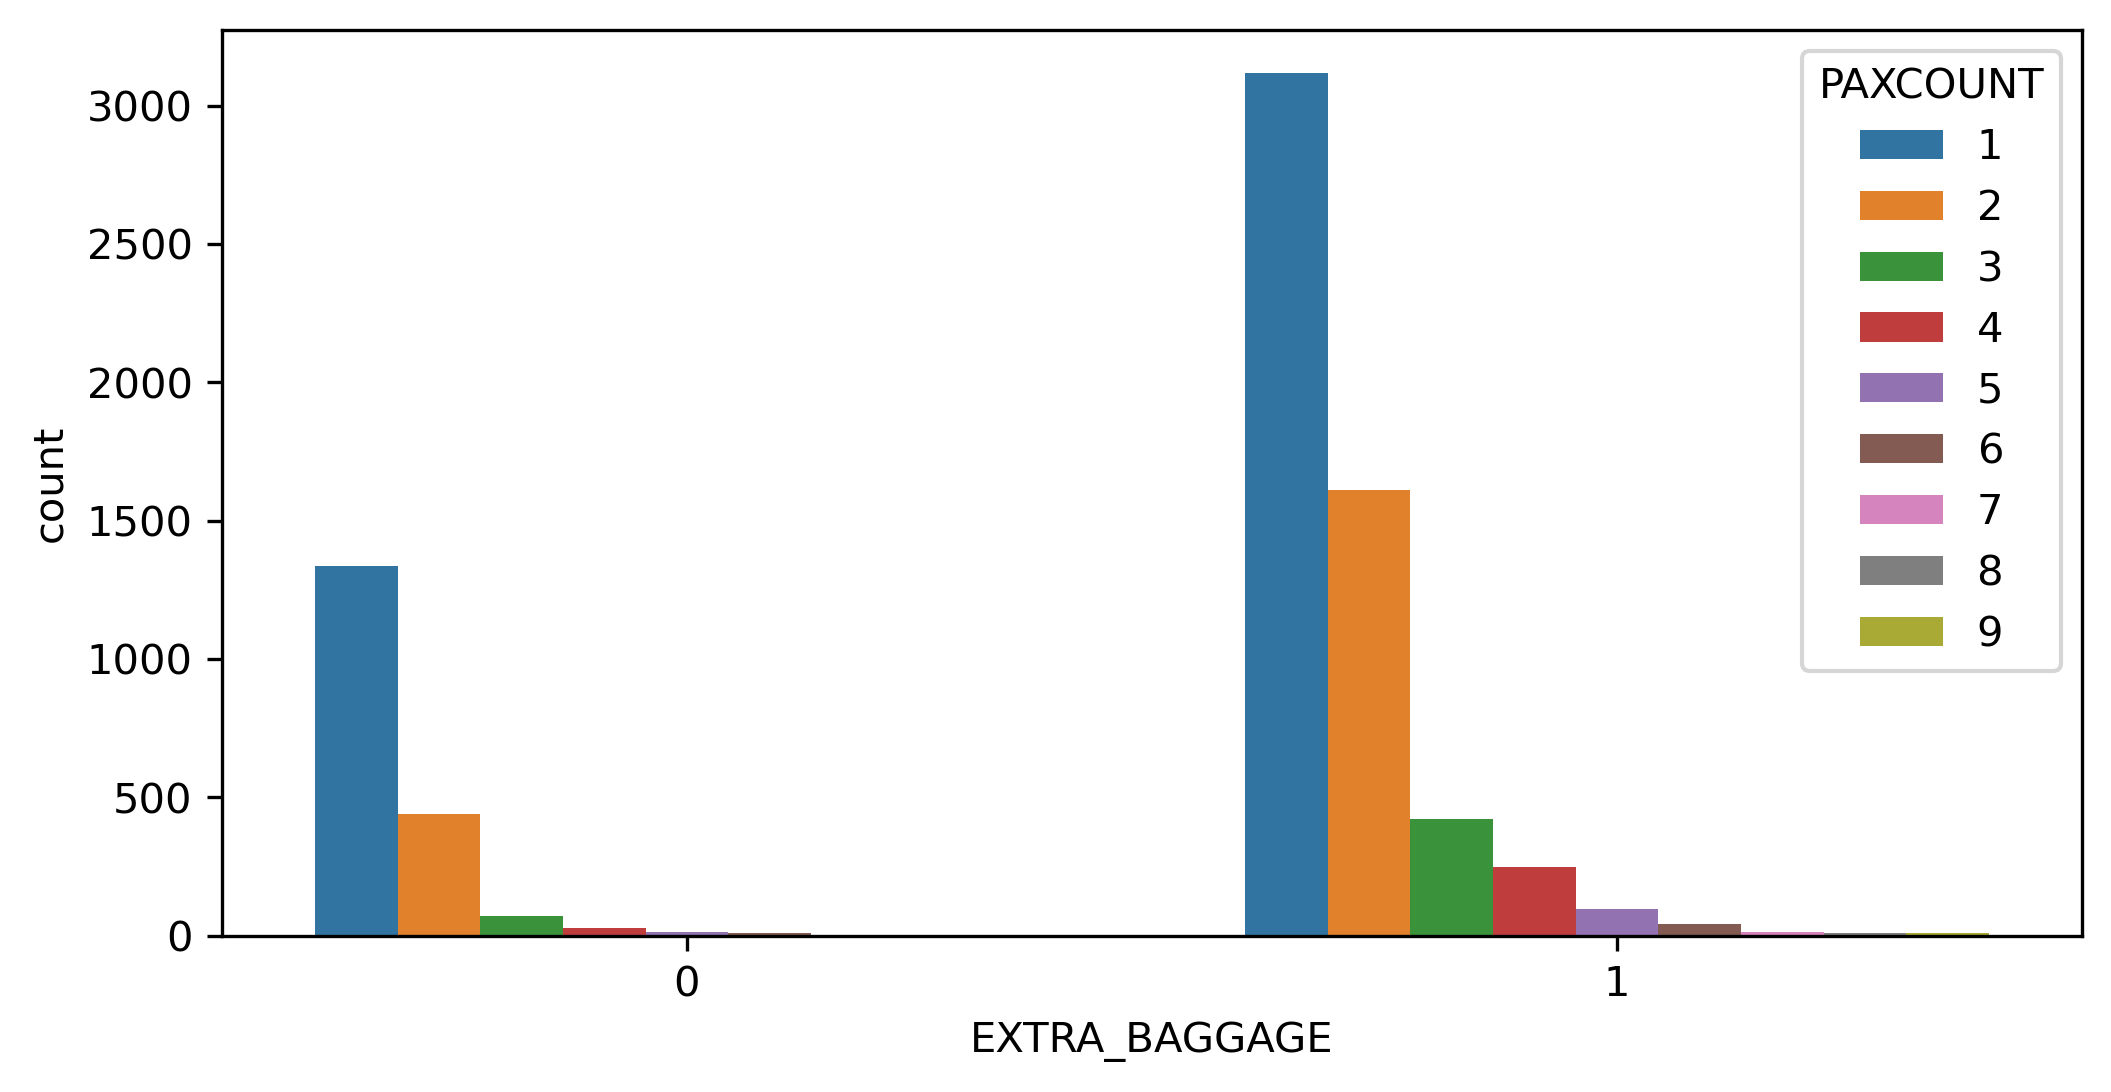

In [36]:
plt.figure(figsize=(8,4),dpi=300)
sns.countplot(x='EXTRA_BAGGAGE',
              data=bought_insurance,
              hue="PAXCOUNT")

As show in the graph above, it is very unlikely that there will be no extra baggages with the increase in the pax count. It is reflected that most customers that travel with 1 or more pax, largely comprises of customers with extra baggage.

However it is also possible for a solo traveler to have extra baggage as well as it is shown that there is a large portion of customers that travel alone and has brought extra baggages.

## Exploring flight duration relationships

Hypothesis:
Longer flight duration hours would expose the customers to a higher risk since they have longer air time and chances of a plane crashing would increase.

<AxesSubplot:xlabel='flightDuration_hour', ylabel='Count'>

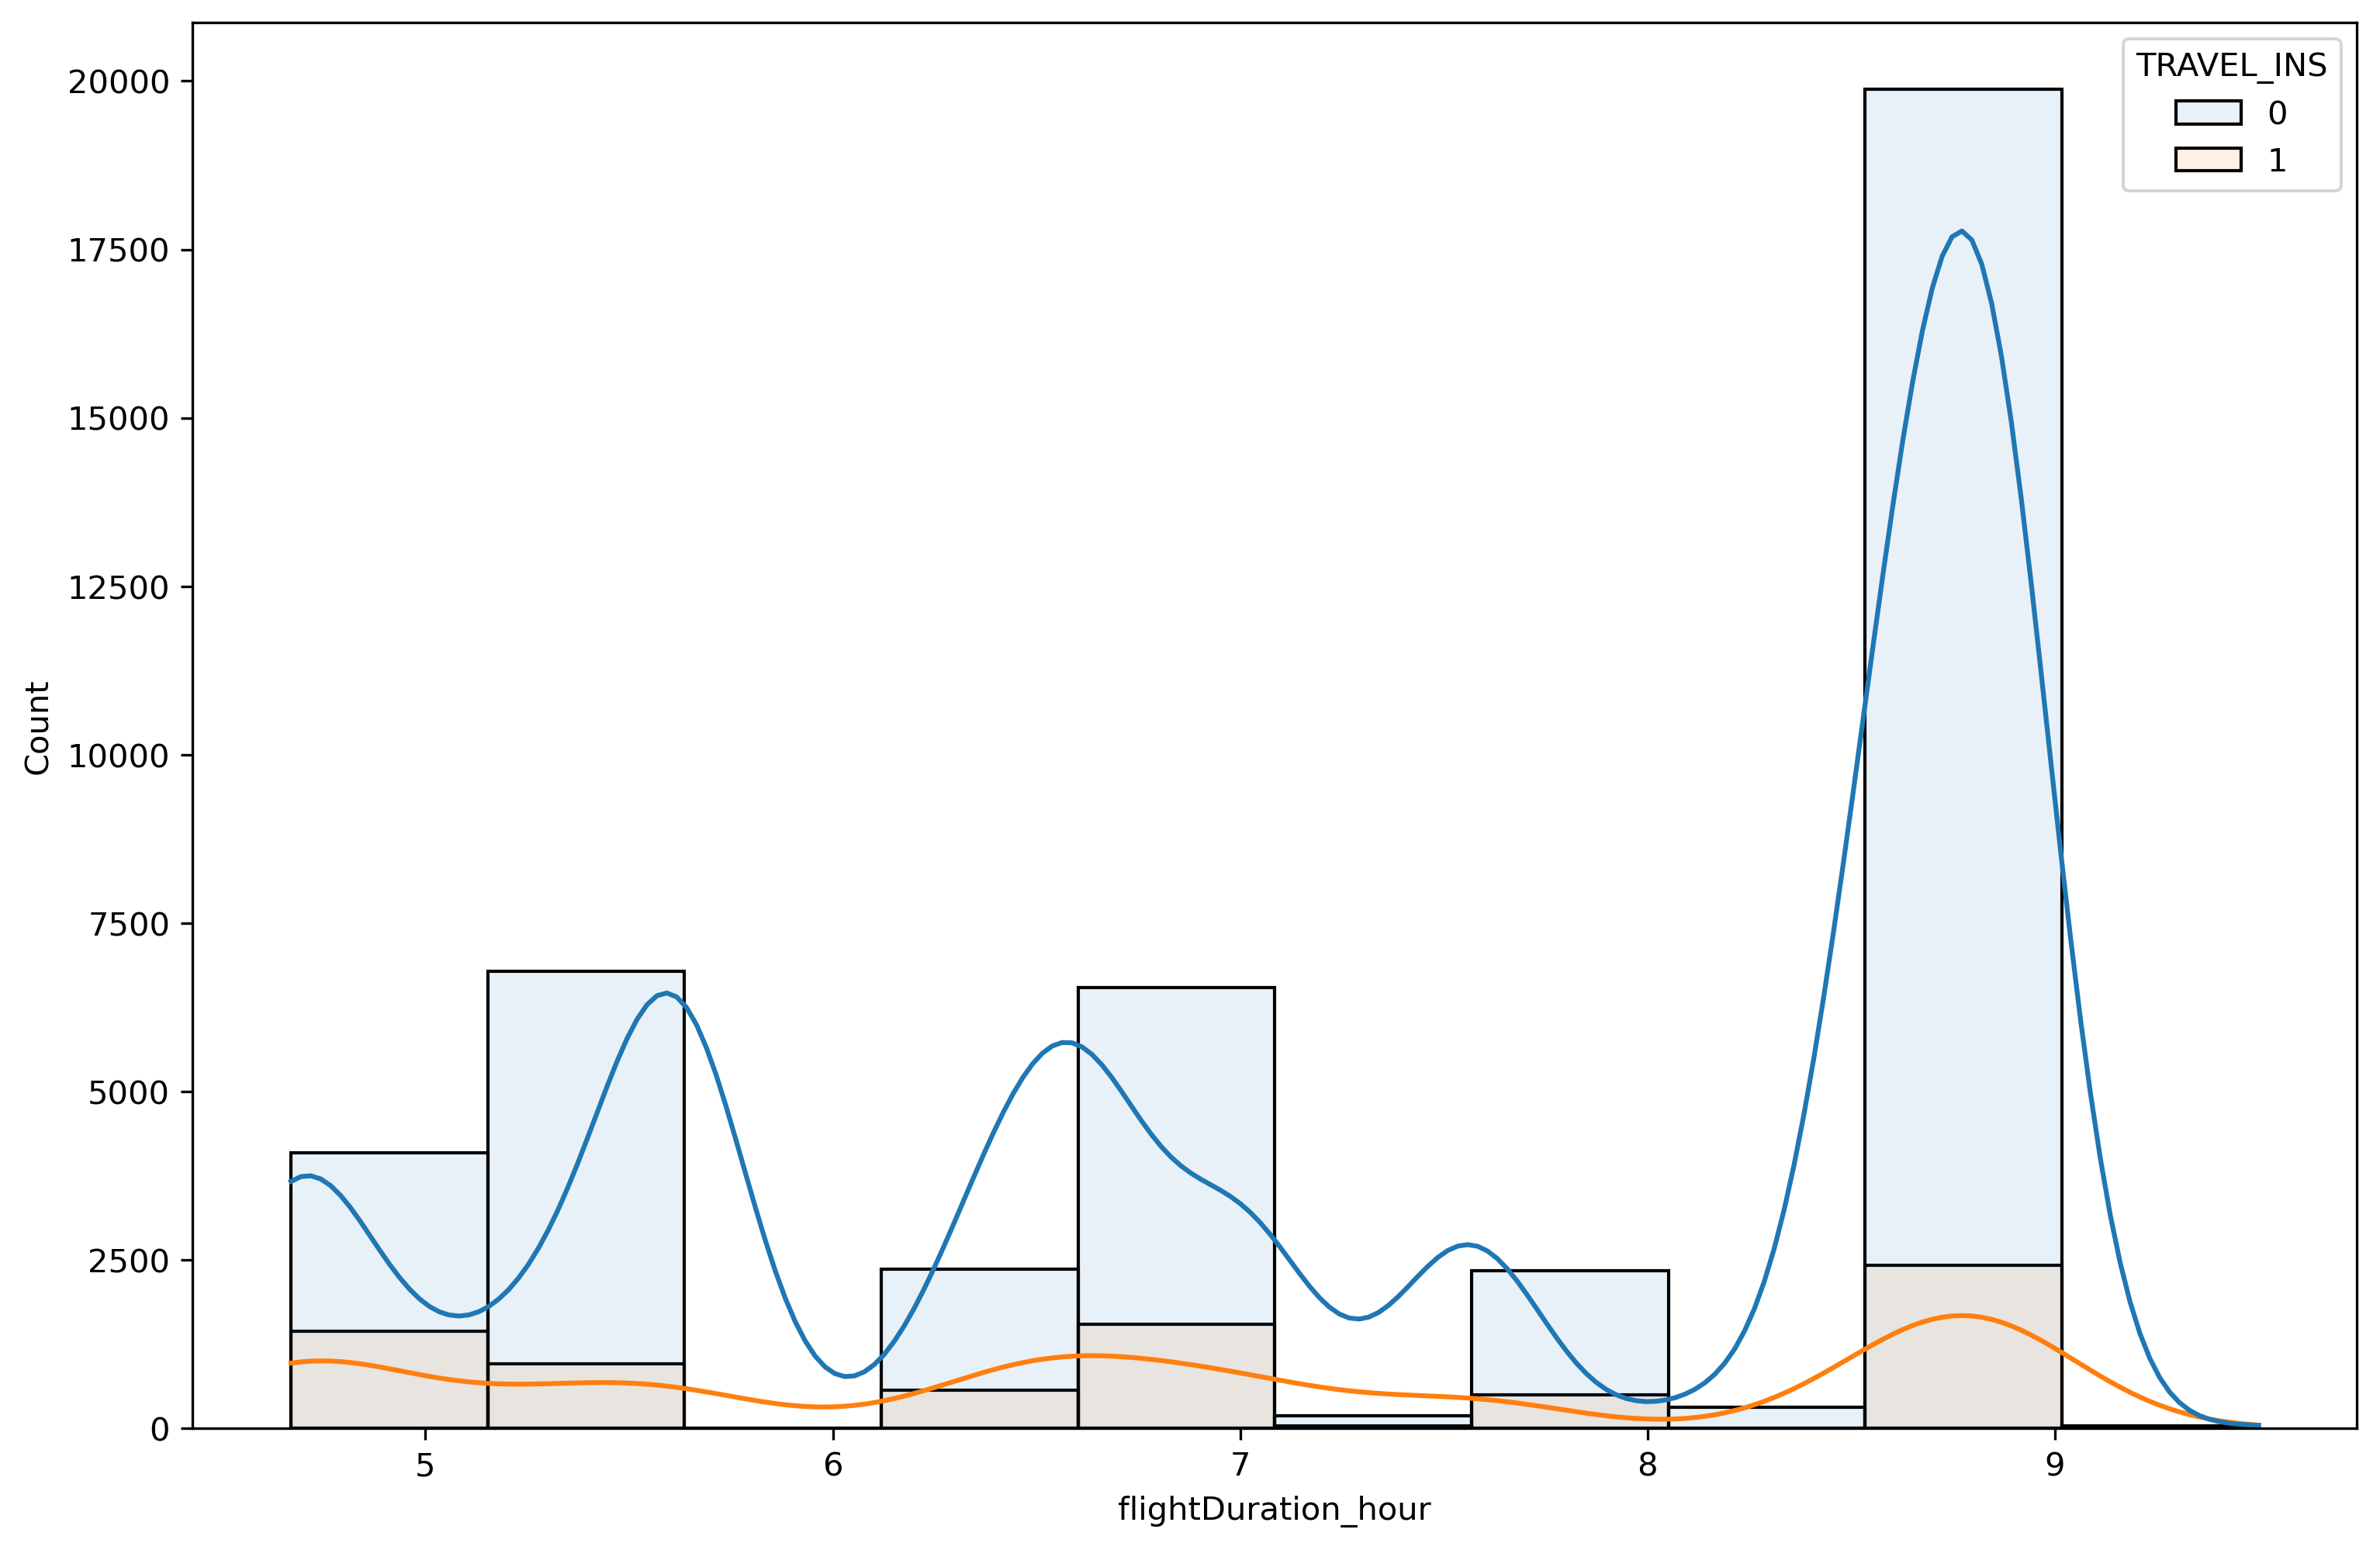

In [37]:
plt.figure(figsize=(12,8),dpi=300)
sns.histplot(data=customers,
             x='flightDuration_hour',
             bins=10,
             kde=True,
             hue='TRAVEL_INS',
             alpha=0.1)

In [38]:
round(len(customers[customers['flightDuration_hour'] >= 8]) / len(customers) * 100,1)

45.3

Through the histogram show above, it can be concluded that there are many inconsistencies among the flight duration hours where certain dips could be observed.

Among all flight durations, most customers would require between 8-9 hours of travel to arrive at his/her desired destination country. 

### Zooming into how the customers are distributed among the flight duration of hours  <= 7

<AxesSubplot:xlabel='flightDuration_hour', ylabel='Count'>

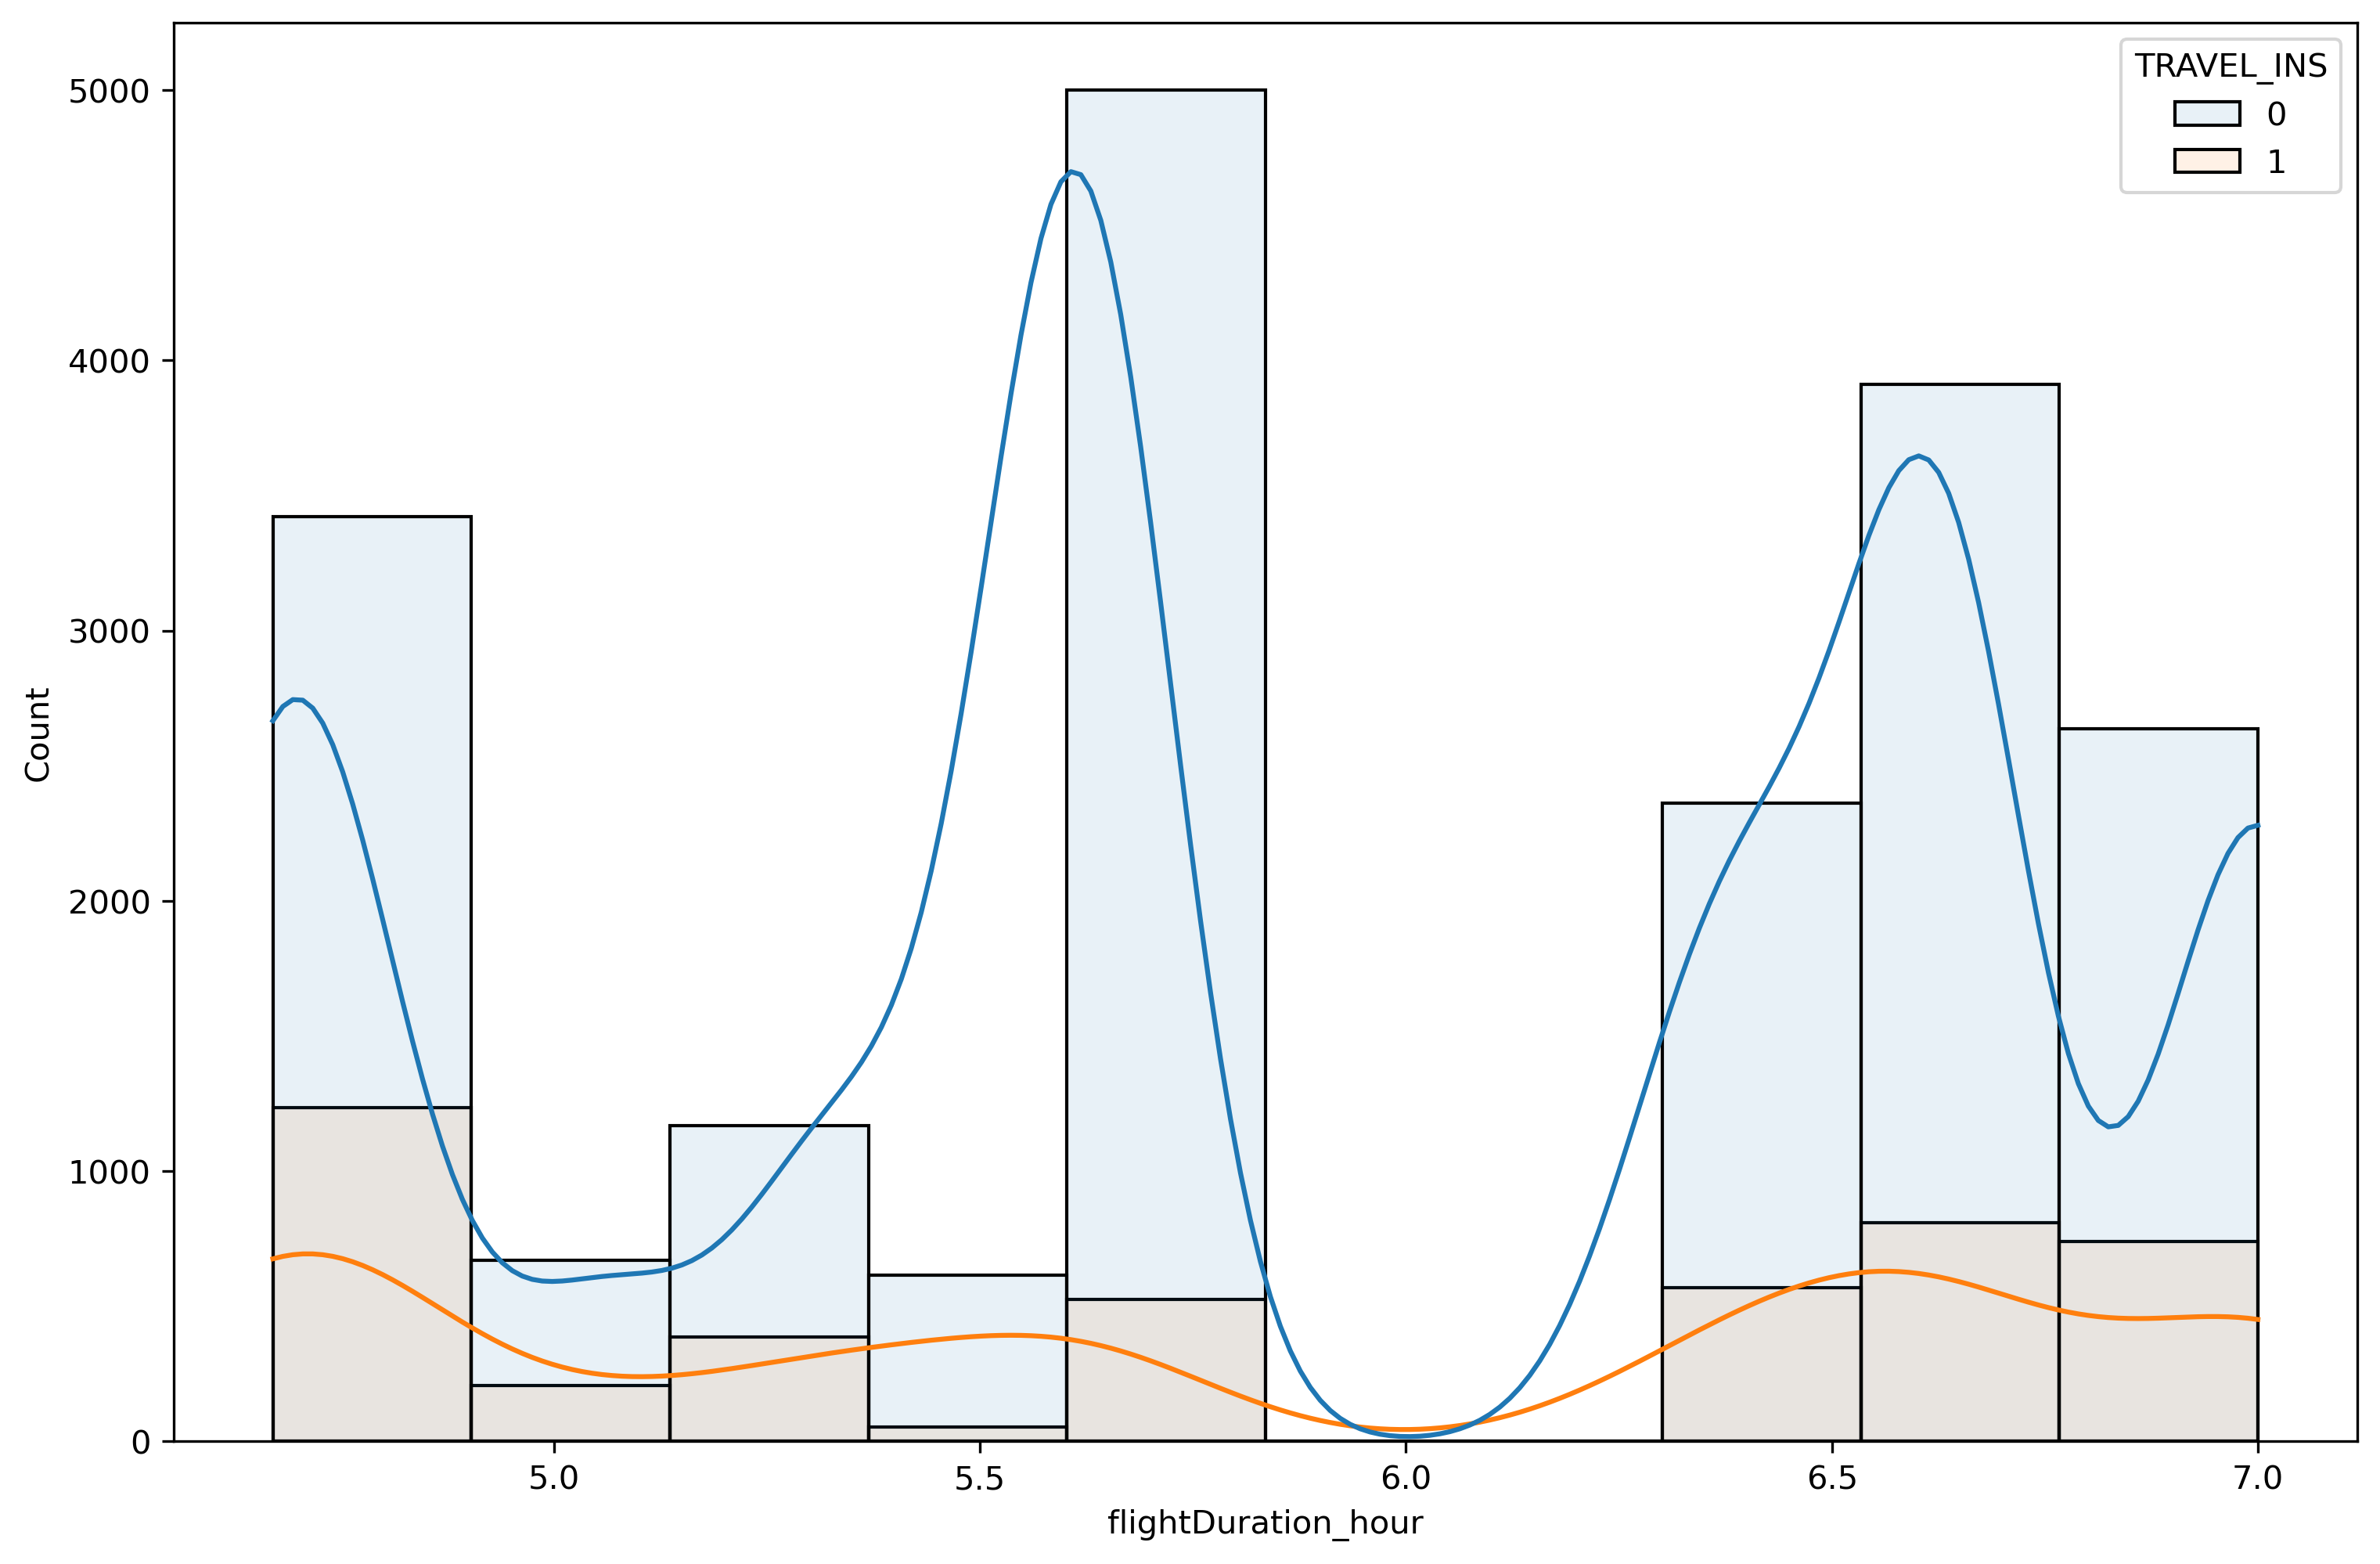

In [39]:
plt.figure(figsize=(12,8),dpi=300)
sns.histplot(data=customers[customers['flightDuration_hour'] <= 7],
             x='flightDuration_hour',
             bins=10,
             kde=True,
             hue='TRAVEL_INS',
             alpha=0.1)

It can be observed that customer's flights rarely need exactly 6hrs to travel to the destination country.

### Zooming into how the customers are distributed among the flight duration of hours >= 7

<AxesSubplot:xlabel='flightDuration_hour', ylabel='Count'>

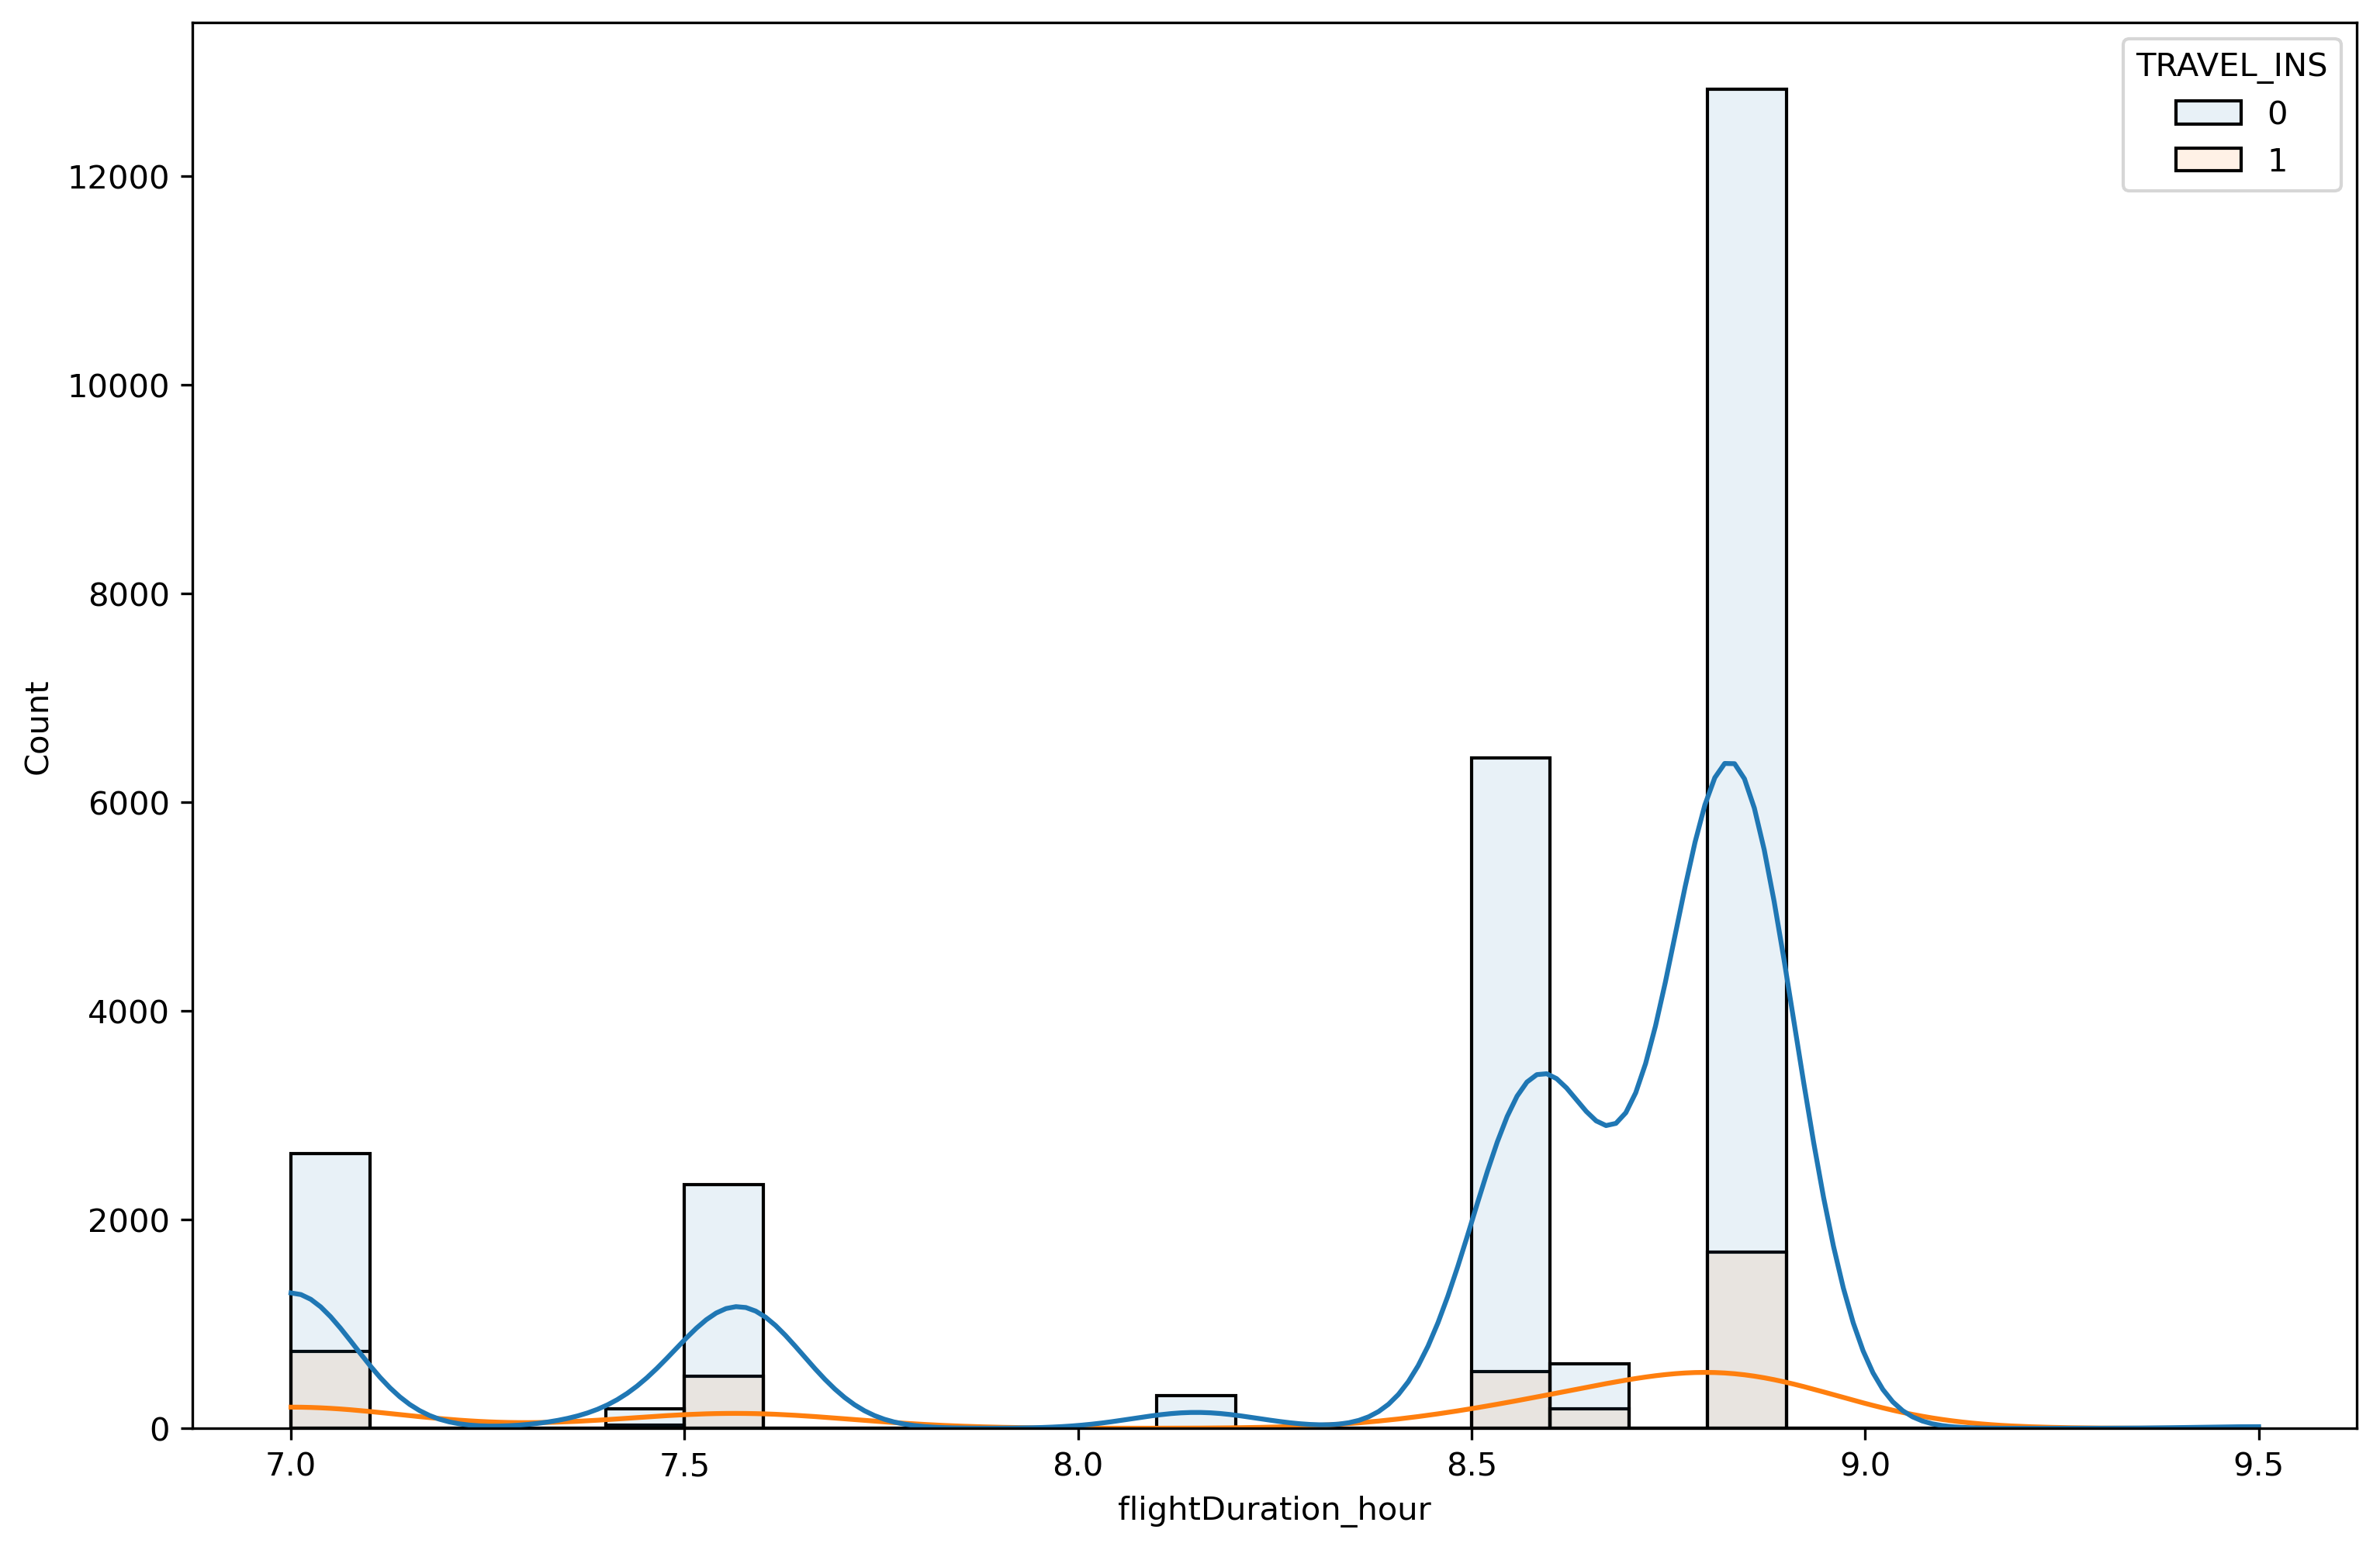

In [40]:
plt.figure(figsize=(12,8),dpi=300)
sns.histplot(data=customers[customers['flightDuration_hour'] >= 7],
             x='flightDuration_hour',
             binwidth = 0.1,
             kde=True,
             hue='TRAVEL_INS',
             alpha=0.1)

# 0.1 bin width would mean a 6min interval. (0.1*60)

From the histogram shown above, there is little to no flights that takes place between:
- 7HRS 6MINSto 7HRS 24MINS
- 7HRS 36MINS to 8HRS 6MINS
- 8HRS 12MINS to 8HRS 30MINS
- 8HRS 42MINS to 8HRS 48MINS
- 8HRS 54MINS to 9HRS 30MINS

# Deploying machine learning models for travel insurance purchase prediction 

Since this is a classification problem, I'll be testing the accuracy of 3 different classification models.
- KNN (K-Nearest-Neighbor)
- Logistic Regression
- Decision Trees

Importing necessary packages for machine learning

In [41]:
from sklearn.metrics import accuracy_score                # For computing model accuracy
from sklearn.model_selection import train_test_split      # To split data into training and test 
from sklearn.metrics import confusion_matrix              # To compute confusion matrix for accuracy evaluation
from sklearn.metrics import ConfusionMatrixDisplay        # To visualize confusion matrix

In [42]:
Modelcm = [] # Creating an empty list to store the confusion matrix for each model

In [43]:
# Re-Evaluating the dataset to check which features might not make sense in the predicition.

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   50000 non-null  int64  
 1   PAXCOUNT             50000 non-null  int64  
 2   SALESCHANNEL         50000 non-null  object 
 3   TRIP_TYPE            50000 non-null  object 
 4   PURCHASELEAD         50000 non-null  int64  
 5   LENGTHOFSTAY         50000 non-null  int64  
 6   flight_hour          50000 non-null  int64  
 7   flight_day           50000 non-null  object 
 8   ROUTE                50000 non-null  object 
 9   ORIGIN_COUNTRY       50000 non-null  object 
 10  EXTRA_BAGGAGE        50000 non-null  int64  
 11  CHOSEN_SEATS         50000 non-null  int64  
 12  ONBOARD_MEALS        50000 non-null  int64  
 13  TRAVEL_INS           50000 non-null  int64  
 14  flightDuration_hour  50000 non-null  float64
dtypes: float64(1), int64(9), object(5)
m

### Dropping redundant columns/features

In [44]:
# Id, route and origin of country does not affect the accuracy of the predicition 
customers = customers.drop(['Id', 'ROUTE','ORIGIN_COUNTRY'], axis=1)

### Encoding object type values with an integer using map()

In [45]:
# Mapping Sales Channel

customers.SALESCHANNEL = customers.SALESCHANNEL.map({'Internet':1,"Mobile":0})

# Mapping Trip Type

customers.TRIP_TYPE = customers.TRIP_TYPE.map({'CircleTrip':2,'RoundTrip':1,'OneWay':0})

# Mapping Day of Week

customers.flight_day = customers.flight_day.map({'Mon':1,'Tue':2,'Wed':3,
                                                 'Thu':4,'Fri':5,'Sat':6,
                                                 'Sun':7})

### Splitting the data into train test splits

In [46]:
y = customers.pop('TRAVEL_INS')       # To pop out the target column
X = customers.select_dtypes('number') # To select data types with number

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80)

## KNN (K-Nearest-Neighbor)

In [48]:
#Import KNN

from sklearn.neighbors import KNeighborsClassifier

### Parameter Tuning for KNN : Changing the number of neighbors through iteration with for loop

In [49]:
knnScores = [] # Creating an empty list to store the accuracy scores of the KNN model

for n in range(2,40+1,2):                       # Creating a for loop to iterate through a range of numbers in steps of 2
    knn = KNeighborsClassifier(n_neighbors=n)   # n, the number in the range(2,40+1,2) will be passed into the KNN's n_neighbour parameter for tuning
    knn.fit(X_train, y_train)                   # Training the model on the training set (using n_neighbors=n)
    y_pred_knn = knn.predict(X_test)            # Testing the model using the test data to check on accuracy.
    knnScores.append(accuracy_score(y_test, y_pred_knn)) # Appending the accuracy scores to the list knnScores

### Creating a plot to visualize changes with each iteration of n (number of neighbors)

The highest accuracy score a KNN model can acheive is 0.84848 with 32 neighbours.


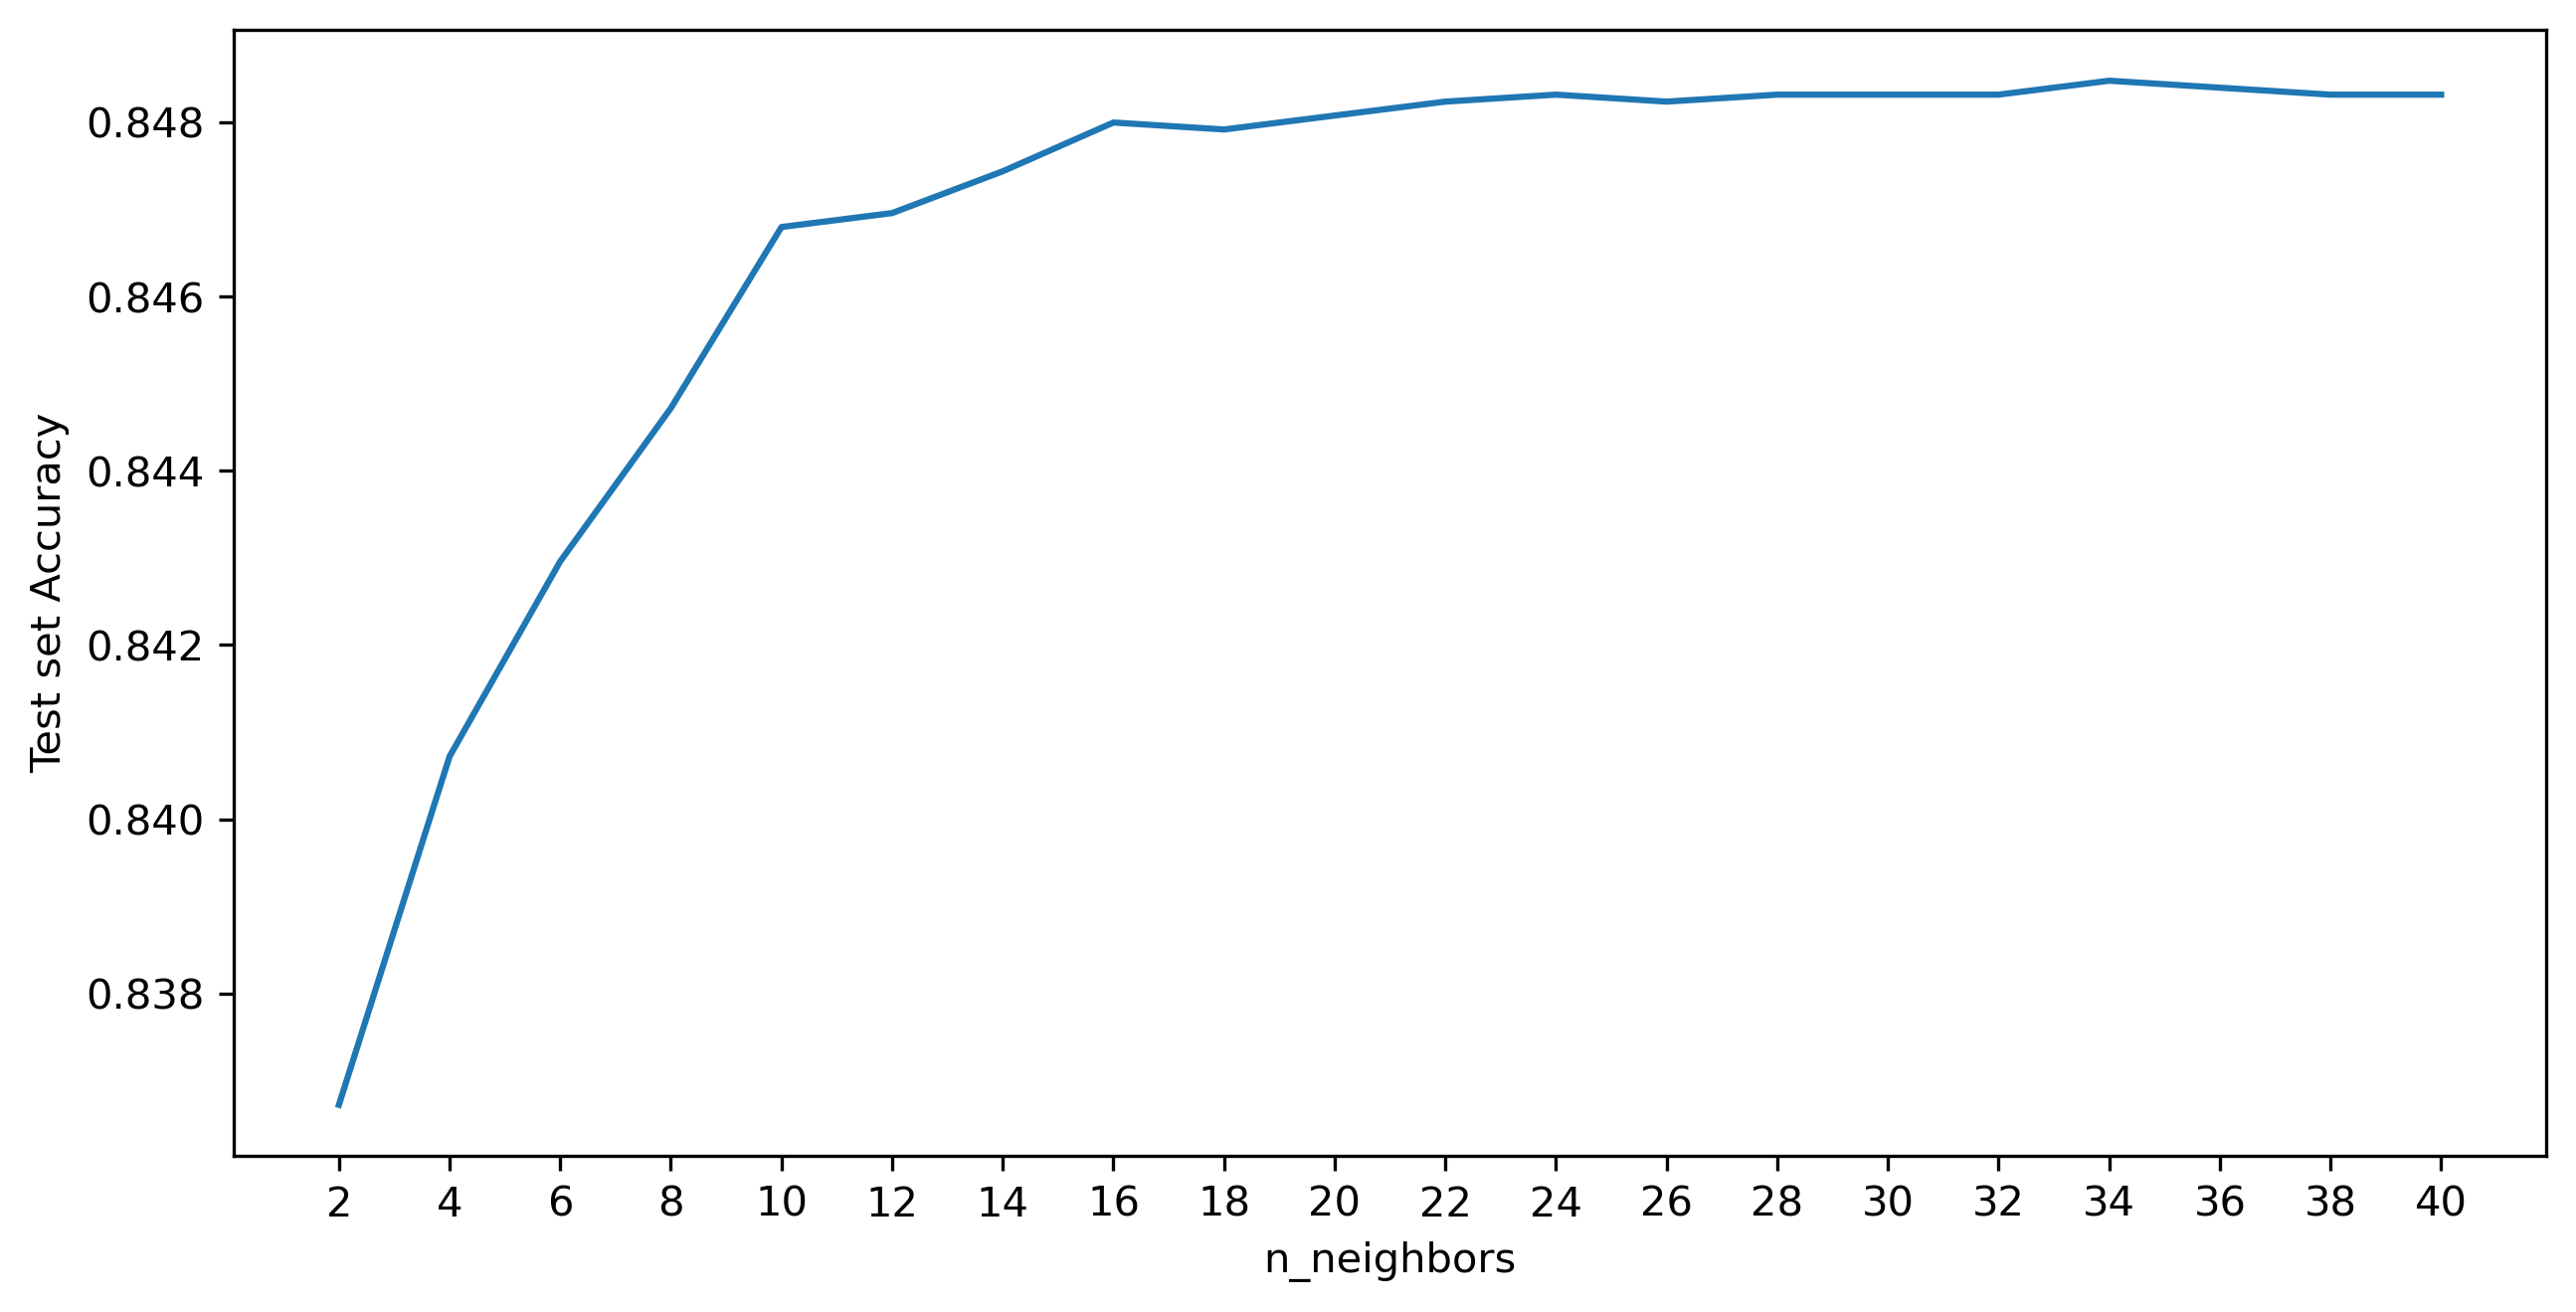

In [50]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(knnScores)                                    
plt.xticks(ticks=range(20),labels=range(2,40+1,2))     
plt.xlabel('n_neighbors')
plt.ylabel('Test set Accuracy')
print(f"The highest accuracy score a KNN model can acheive is {max(knnScores)} with {knnScores.index(max(knnScores))*2} neighbours.")

Accuracy scores by K-Nearest-Neighbor starts to plateau at the 12 iteration(24 Neighbors) and peaked at the 16th (32 Neighbors) with an accuracy score of 0.84848.

### Visualizing the confusion matrix for the KNN model with the best parameters(n=32)

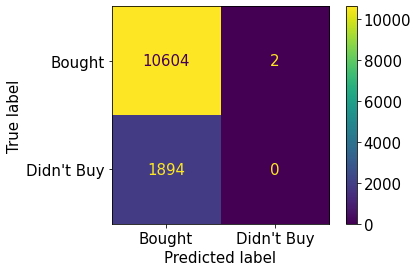

In [51]:
knn = KNeighborsClassifier(n_neighbors=knnScores.index(max(knnScores))*2)
knn.fit(X_train, y_train)                 
y_pred_knn = knn.predict(X_test)
font = {'family' : 'DejaVu Sans',
        'size'   : 15}
plt.rc('font', **font)  

cm = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(cm,display_labels=np.array(['Bought',"Didn't Buy"])) # visualize
Modelcm.append(cm_display)
cm_display.plot() # To visualize the cm for logistic regression model

## Logistic Regression

In [52]:
# Import Logistic Regression

from sklearn.linear_model import LogisticRegression

In [53]:
import warnings
warnings.simplefilter('ignore')

In [54]:
logreg = LogisticRegression()   # Creating a logistic regression model.
logreg.fit(X_train, y_train)    # Training the logistic regression model.
y_pred_logreg = logreg.predict(X_test) # Testing the model using the test data to check on accuracy.
print('Accuracy: ', accuracy_score(y_test, y_pred_logreg))

Accuracy:  0.84848


The accuracy score(0.84848) offered by the logistic regression model is similar to the highest accuracy a KNN model can acheive!

### Visualizing the confusion matrix for logistic regression model

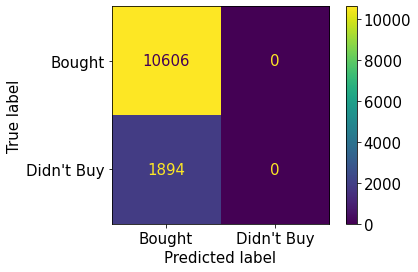

In [55]:
font = {'family' : 'DejaVu Sans',
        'size'   : 15}
plt.rc('font', **font)  # default confusion matrix text size is too small. 

cm = confusion_matrix(y_test, y_pred_logreg) # calculate

cm_display = ConfusionMatrixDisplay(cm,display_labels=np.array(['Bought',"Didn't Buy"]))
Modelcm.append(cm_display)
cm_display.plot() # To visualize the cm for logistic regression model

## Decision Tree 

In [56]:
# Import Decision Trees

from sklearn.tree import DecisionTreeClassifier

In [57]:
# Changing the y value to boolean values and assigning it a new variable Y

Y = y == 1 #to make it true or false

In [58]:
# Y in train test split is different from the y's used for logregression and knn since Y is now a boolean value
# Do i need to split the data again into train test split if Y is now a boolean value?

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=88)

### Parameter Tuning for Decision Tree : Changing the level of depth of the decision tree

In [59]:
scores = {}

for depth in range(2,18+1,2):   # Increasing the number of splits and therefore increasing the complexity
    dt = DecisionTreeClassifier(max_depth=depth) # Creating decision tree model
    dt.fit(X_train, y_train) # Training the decision tree model
    y_pred_dt = dt.predict(X_test) # Testing the model using the test data to check on accuracy.
    scores[depth] = accuracy_score(y_test,y_pred_dt) #the score decreases because it starts to overfit and not able to generalize the data properly on the test data
    
DTscore_table = pd.Series(data=scores)
DTscore_table

2     0.84920
4     0.84912
6     0.84808
8     0.84568
10    0.83976
12    0.82928
14    0.81368
16    0.80024
18    0.78008
dtype: float64

The highest accuracy score that can be acheived with a decison tree model is 0.84920. Slighty higher accuracy score compared to both KNN and logistic regression models!

### Creating a plot to visualize changes with each iteration of n (number of neighbors)

Text(0, 0.5, 'Test set Accuracy')

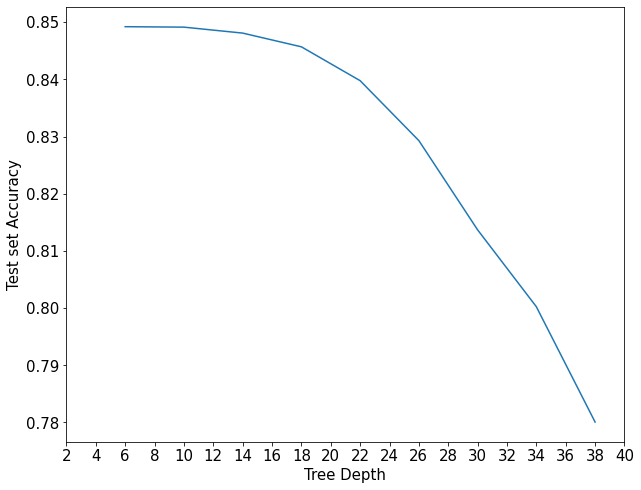

In [60]:
plt.figure(figsize=(10,8))
plt.plot(DTscore_table)                                     
plt.xticks(ticks=range(20),labels=range(2,40+1,2))     
plt.xlabel('Tree Depth')
plt.ylabel('Test set Accuracy')

### Visualizing the confusion matrix for the decision tree model with the best parameters(max_depth=2)

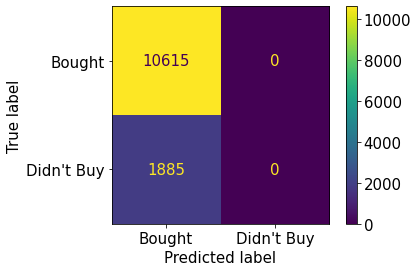

In [61]:
best_depth = max(scores, key=scores.get)
dt = DecisionTreeClassifier(max_depth=best_depth) # Creating decision tree model
dt.fit(X_train, y_train) # Training the decision tree model
y_pred_dt = dt.predict(X_test)
font = {'family' : 'DejaVu Sans',
        'size'   : 15}
plt.rc('font', **font)  # default confusion matrix text size is too small. 

cm = confusion_matrix(y_test, y_pred_dt) # calculate

cm_display = ConfusionMatrixDisplay(cm,display_labels=np.array(['Bought',"Didn't Buy"]))

Modelcm.append(cm_display)
cm_display.plot() # To visualize the cm for logistic regression model

## KNN (K-Nearest-Neighbor) with normalized feature values

In [62]:
customers_standardized = (customers-customers.mean())/customers.std()

In [63]:
X = customers_standardized.select_dtypes('number') # To select data types with number
# y=y no changes since y value is a target output

In [64]:
# Displaying the normalized feature values 

X  

,PAXCOUNT,SALESCHANNEL,TRIP_TYPE,PURCHASELEAD,LENGTHOFSTAY,flight_hour,flight_day,EXTRA_BAGGAGE,CHOSEN_SEATS,ONBOARD_MEALS,flightDuration_hour
0,0.400680,0.355781,0.054117,1.957510,-0.119352,-0.381761,1.096743,0.703740,-0.649912,-0.863488,-1.174163
1,-0.579553,0.355781,0.054117,0.299161,-0.089843,-1.120769,1.096743,-1.420951,-0.649912,-0.863488,-1.174163
2,0.400680,0.355781,0.054117,1.747453,-0.030824,1.465760,-0.408683,0.703740,1.538639,-0.863488,-1.174163
3,-0.579553,0.355781,0.054117,0.122270,0.234759,-0.936017,1.096743,-1.420951,-0.649912,1.158070,-1.174163
4,0.400680,0.355781,0.054117,-0.187288,-0.030824,1.096256,-0.408683,0.703740,-0.649912,1.158070,-1.174163
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400680,0.355781,0.054117,-0.640570,-0.502972,-0.012256,1.096743,0.703740,-0.649912,1.158070,-1.107356
49996,-0.579553,0.355781,0.054117,0.288105,-0.502972,-0.936017,1.598551,-1.420951,-0.649912,-0.863488,-1.107356
49997,-0.579553,0.355781,0.054117,-0.673737,-0.502972,2.389520,1.096743,-1.420951,-0.649912,1.158070,-1.107356
49998,-0.579553,0.355781,0.054117,-0.773238,-0.502972,0.357248,-1.412300,0.703740,-0.649912,1.158070,-1.107356


In [65]:
# Separate split for the new normalized feature values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80)

In [66]:
knnScoresScaled = [] # Creating an empty list to store the accuracy scores of the KNN model

for n in range(2,40+1,2):                       # Creating a for loop to iterate through a range of numbers in steps of 2
    knn = KNeighborsClassifier(n_neighbors=n)   # n, the number in the range(2,40+1,2) will be passed into the KNN's n_neighbour parameter for tuning
    knn.fit(X_train, y_train)                   # Training the model on the training set (using n_neighbors=n)
    y_pred_knnScaled = knn.predict(X_test)          # Testing the model using the test data to check on accuracy.
    knnScoresScaled.append(accuracy_score(y_test, y_pred_knnScaled)) # Appending the accuracy scores to the list knnScores

Text(0, 0.5, 'Test set Accuracy')

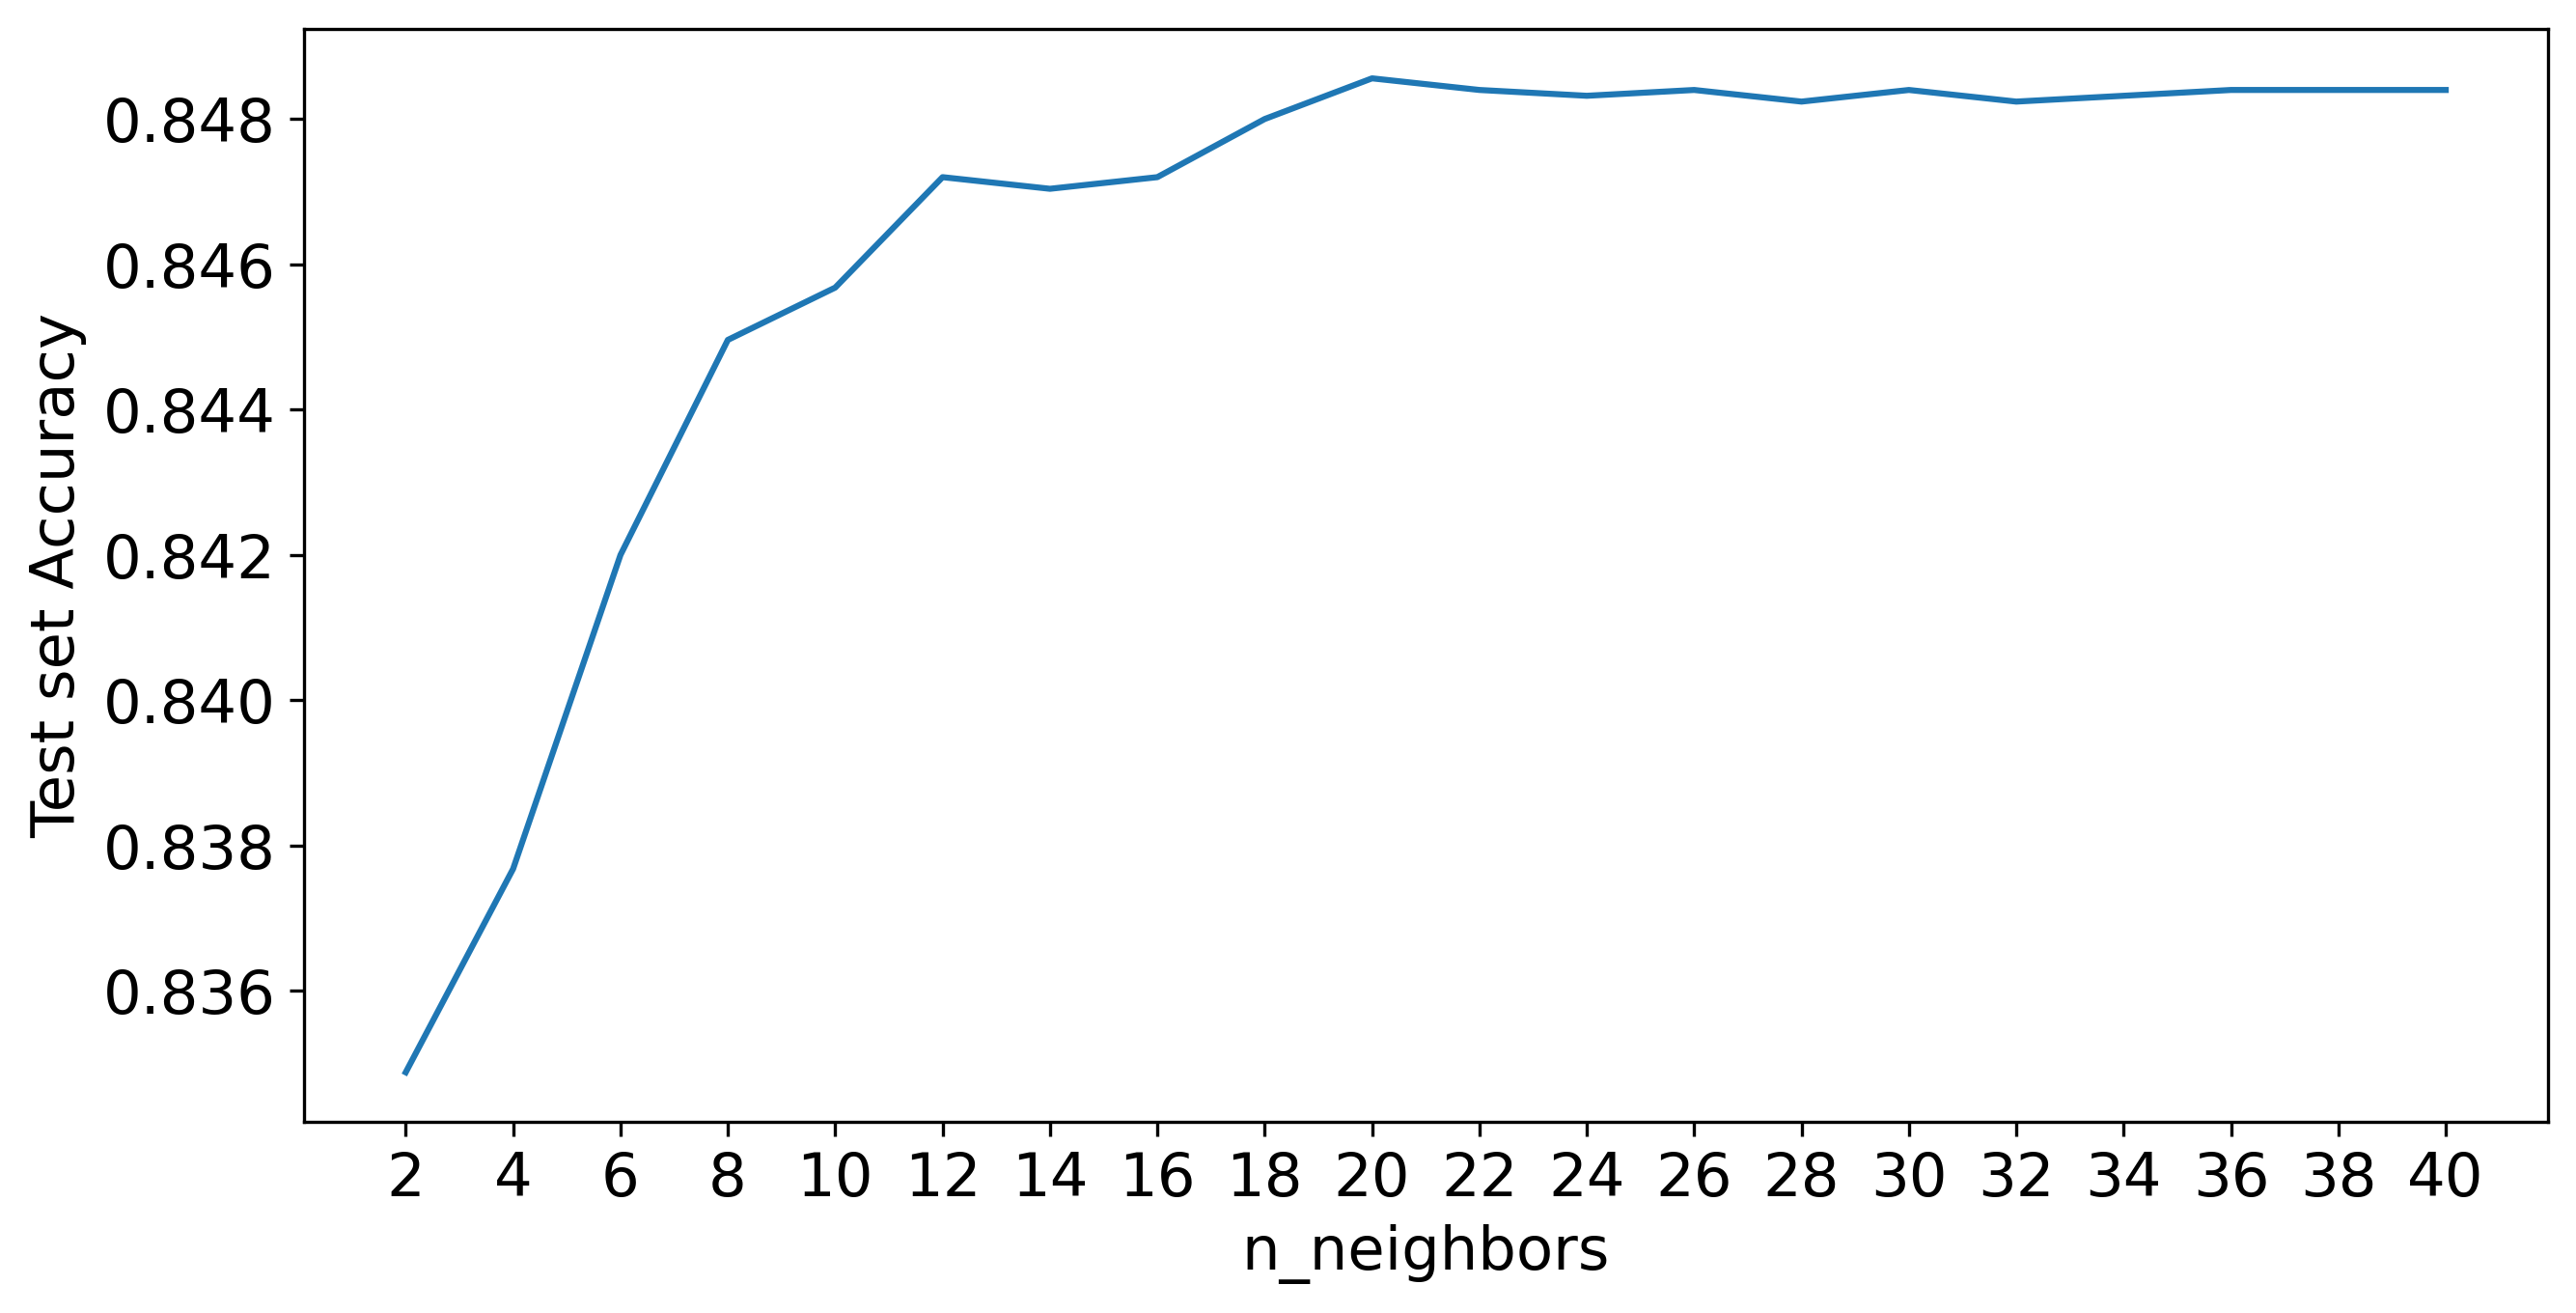

In [67]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(knnScoresScaled)                                    
plt.xticks(ticks=range(20),labels=range(2,40+1,2))     
plt.xlabel('n_neighbors')
plt.ylabel('Test set Accuracy')

In [68]:
max(knnScoresScaled)

0.84856

In [69]:
max(knnScores)

0.84848

In [70]:
print(f'''
Maximum Accuracy Acheived with KNN WITHOUT normalization: {max(knnScores)}
Maximum Accuracy Acheived with KNN WITH normalization: {max(knnScoresScaled)}
Difference in accuracy: {max(knnScoresScaled) - max(knnScores):.5f}
''')


Maximum Accuracy Acheived with KNN WITHOUT normalization: 0.84848
Maximum Accuracy Acheived with KNN WITH normalization: 0.84856
Difference in accuracy: 0.00008



### Visualizing the confusion matrix for the KNN model with the best parameters(n=32) WITH NORMALIZED FEATURE VALUES

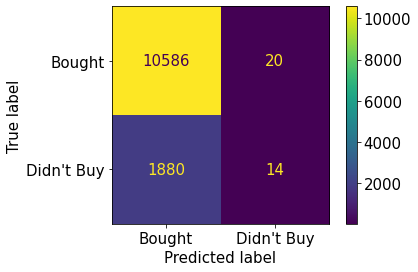

In [71]:
knn = KNeighborsClassifier(n_neighbors=knnScoresScaled.index(max(knnScoresScaled))*2)
knn.fit(X_train, y_train)                
y_pred_knnScaled = knn.predict(X_test)
font = {'family' : 'DejaVu Sans',
        'size'   : 15}
plt.rc('font', **font)  

cm = confusion_matrix(y_test, y_pred_knnScaled)
cm_display = ConfusionMatrixDisplay(cm,display_labels=np.array(['Bought',"Didn't Buy"])) # visualize
Modelcm.append(cm_display)
cm_display.plot() # To visualize the cm for logistic regression model

## Logistic Regression with normalized feature values

In [72]:
logreg = LogisticRegression()   # Creating a logistic regression model
logreg.fit(X_train, y_train)    # Training the logistic regression model
y_pred_logregScaled = logreg.predict(X_test) # Testing the model using the test data to check on accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_logregScaled))

Accuracy:  0.84848


### Visualizing the confusion matrix for logistic regression model WITH NORMALIZED FEATURE VALUES

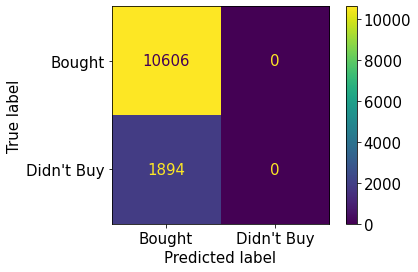

In [73]:
font = {'family' : 'DejaVu Sans',
        'size'   : 15}
plt.rc('font', **font)  

cm = confusion_matrix(y_test, y_pred_logregScaled)
cm_display = ConfusionMatrixDisplay(cm,display_labels=np.array(['Bought',"Didn't Buy"])) # visualize
Modelcm.append(cm_display)
cm_display.plot() # To visualize the cm for logistic regression model

# Conclusion

After testing the 3 classification models (together with normalized feature values for both KNN and logistic regression), the decision tree model was able to acheive the best accuracy compared to other models. However the overall differences in accuracy among the different models are not very significant.

In [74]:
modeldict = {'Highest Accuracy': [max(knnScores), accuracy_score(y_test, y_pred_logreg), max(DTscore_table),
                                  max(knnScoresScaled),accuracy_score(y_test, y_pred_logregScaled)]}
pd.DataFrame.from_dict(modeldict, orient='index', columns=['KNN', 'Logistic Regression', 'Decision Tree',
                                                           'KNN(Scaled)','Logistic Regression(Scaled)'])

,KNN,Logistic Regression,Decision Tree,KNN(Scaled),Logistic Regression(Scaled)
Highest Accuracy,0.84848,0.84848,0.8492,0.84856,0.84848


## Overview of the confusion matrix for the different models tested

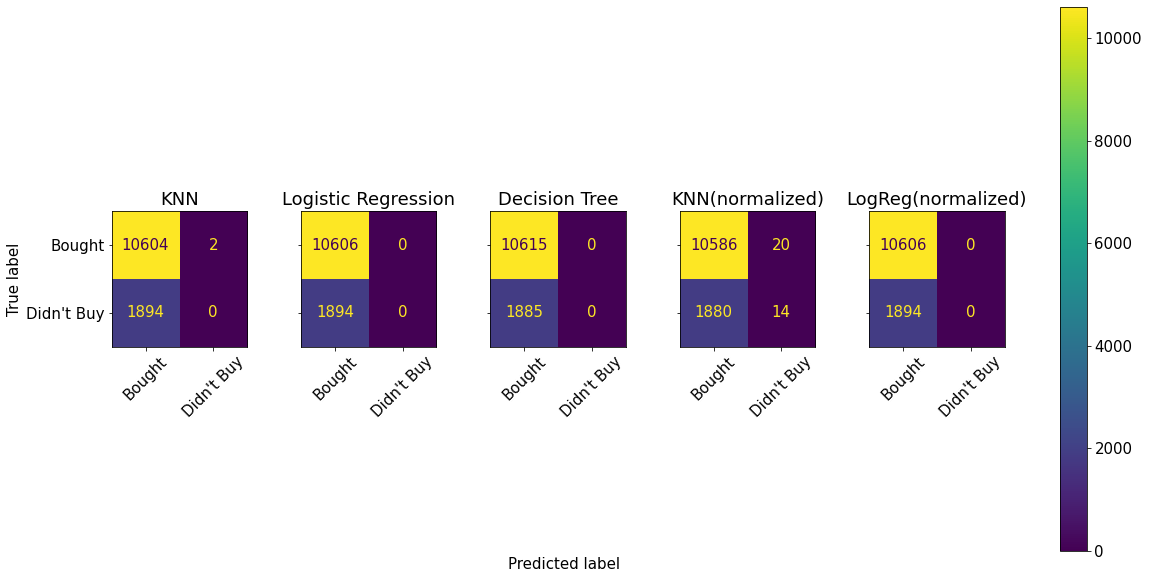

In [75]:
models = ['KNN', 'Logistic Regression', 'Decision Tree', 'KNN(normalized)', 'LogReg(normalized)']
f, axes = plt.subplots(1, 5, figsize=(20, 10), sharey='row')
i = 0
for cm in Modelcm:
    cm.plot(ax=axes[i], xticks_rotation=45)
    cm.ax_.set_title(models[i])
    cm.im_.colorbar.remove()
    cm.ax_.set_xlabel('')
    if i!=0:
        cm.ax_.set_ylabel('')
    i += 1

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(cm.im_, ax=axes)
plt.show()